<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/52_C_Datos_A_E_Datos_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Teoría de Probabilidad por Julio Hurtado Márquez**
## **Parte XIII- Análisis Exploratorio de Datos**
# **Librerias para usar en esta parte del curso**

In [ ]:
# **Librerias para usar en esta parte del cursor**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # para visualizacion de datos
%matplotlib inline
import seaborn as sns # para visualizacion de datos
from scipy import stats
import warnings # Para ignorar todas las advertencias
warnings.filterwarnings("ignore", category=FutureWarning)
from sympy.functions.combinatorial.factorials import factorial
import math
from math import sqrt
from numpy.ma.core import log
from sympy import integrate, init_printing
from sympy.abc import x
print("Setup Complete")

Setup Complete


# **220. Parte I: Ejemplo 1.  Análisis de Componentes Princiapales (PCA) y Cluster - Análisis Exploratorio de Datos**

# **a. Base de datos - PCA**
+ Los datos en csv se encuentran separados por espacios

In [ ]:
# **a. Base de datos - PCA**
df_marketing=pd.read_csv("/content/marketing_campaign.csv",sep='\t') # los datos se encuentran separados por espacios
df_marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# **b. Conoscamos acerca de las columnas con las cuales vamos a trabajar y la dimension de la data**

## **b1. Todas las columnas a trabajar**

In [ ]:
# **b1. Todas las columnas a trabajar**
df_marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## **b2. La dimensión de la data**

In [ ]:
# **b2. La dimensión de la data**
df_marketing.shape

(2240, 29)

## **b3. Información acerca de las variables a trabajar**

In [ ]:
# **b3. Información acerca de las variables a trabajar**
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **b4. Cambiamos una variable de un formato _Object_ a un formato de _fecha_**:
+ Usamos el método _to_datetime_ de Pandas

In [ ]:
## **b4. Cambiamos una variable de un formato Object a un formato de fecha**
df_marketing['Dt_Customer']=pd.to_datetime(df_marketing['Dt_Customer'])

<ipython-input-6-28fab517c5f1>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_marketing['Dt_Customer']=pd.to_datetime(df_marketing['Dt_Customer'])


## **b5. Verifiquemos que el cambio fue realizado**

In [ ]:
## **b5. Verifiquemos que el cambio fue realizado**
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# **c. Veamos si la data contiene datos perdidos - Imputacion de Datos Perdidos**
+ Tenemos 24 datos perdidos en la variable ingreso

## **c1. Veamos si contiene datos perdidos**
+ usamos el métos _isnull().sum()_ con la cual nos detecta por variable cuantos datos atipicos tenemos.

In [ ]:
## **c1. Veamos si contiene datos perdidos**
df_marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

##**c2. Corroboramos nuevamente si contiene datos perdidos**

In [ ]:
##**c2. Veamos si contiene datos perdidos**
df_marketing.isnull().sum().sum()

24

## **c3. Imputamos - los valores perdidos usando la mediana de los dats**
+  **Paso 1. Calculamos la mediana de los datos**
+ **Paso 2. Hacemos la imputación aplicando el metod _fillna()_**

In [ ]:
# **d. IMputamos los datos faltantes con la mediana**
med_inc = df_marketing['Income'].median()
df_marketing['Income'] = df_marketing['Income'].fillna(med_inc)
print('La mediana para income =',med_inc )

La mediana para income = 51381.5


## **c4. Chequeamos nuevamente si no aparecen datos perdidos**

In [ ]:
## **c4. Chequeamos nuevamente si no aparecen datos perdidos**
df_marketing.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
## **c4. Chequeamos nuevamente si no aparecen datos perdidos**
df_marketing.isnull().sum().sum()

0

# **d. Acerca del conjunto de datos**
+ **Contexto**. Un modelo de respuesta puede proporcionar un impulso significativo a la eficiencia de una campaña de marketing al aumentar las respuestas o reducir los gastos. El objetivo es predecir quién responderá a una oferta de un producto o servicio.

+ **Contenido**
 - AcceptedCmp1 - 1 si el cliente aceptó la oferta en la 1.ª campaña, 0 en caso contrario
 - AcceptedCmp2 - 1 si el cliente aceptó la oferta en la 2.ª campaña, 0 en caso contrario
 - AcceptedCmp3 - 1 si el cliente aceptó la oferta en la 3.ª campaña, 0 en caso contrario
 - AcceptedCmp4 - 1 si el cliente aceptó la oferta en la 4.ª campaña, 0 en caso contrario
 - AcceptedCmp5 - 1 si el cliente aceptó la oferta en la 5.ª campaña, 0 en caso contrario
 - Respuesta (objetivo) - 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario
 - Quejar - 1 si el cliente se quejó en los últimos 2 años
 - DtCliente - fecha de inscripción del cliente en la empresa
 - Educación - nivel de educación del cliente
 - Civil - estado civil del cliente
 - Kidhome: número de niños pequeños en el hogar del cliente
 - Teenhome: número de adolescentes en el hogar del cliente
 - Income: ingreso anual del hogar del cliente
 - MntFishProducts: cantidad gastada en productos pesqueros en los últimos 2 años
 - MntMeatProducts: cantidad gastada en productos cárnicos en los últimos 2 años
 - MntFruits: cantidad gastado en productos de frutas en los últimos 2 años
 - MntSweetProducts - cantidad gastada en productos dulces en los últimos 2 años
 - MntWines - cantidad gastada en productos de vino en los últimos 2 años
 - MntGoldProds - cantidad gastada en productos de oro en los últimos 2 años
 - NumDealsPurchases - número de compras hecho con descuento
 - NumCatalogPurchases - número de compras hechas usando el catálogo
 - NumStorePurchases - número de compras realizadas directamente en las tiendas
 - NumWebPurchases - número de compras realizadas a través del sitio web de la empresa
 - NumWebVisitsMonth - número de visitas al sitio web de la empresa en el último mes
 - Recency - número de días desde la última compra

+ **Agradecimientos**. O. Parr-Rud. Business Analytics utilizando SAS Enterprise Guide y SAS Enterprise Miner. Instituto SAS, 2014.

+ **Inspiración**. El objetivo principal es entrenar un modelo predictivo que permita a la empresa maximizar el beneficio de la próxima campaña de marketing.




|Variable|Informacion|
|:--:|:--:|
|Year_Birth  |           	Año_nacimiento
|Education    |          	Educación
|Marital_Status|         	Estado civil
|Income         |        	Ingreso
|Kidhome         |       	niños en casa
|Teenhome         |      	Adolescente en casa
|Dt_Customer       |     	Dt_Cliente
|Recency            |    	Actualidad
|MntWines            |   	MntVinos
|MntFruits            |  	MntFrutas
|MntMeatProducts       | 	MntCarneProductos
|MntFishProducts        |	MntFishProducts
|MntSweetProducts       |	MntSweetProducts
|MntGoldProds           |	MntGoldProds
|NumDealsPurchases      |	NumOfertasCompras
|NumWebPurchases        |	NumWebPurchases
|NumCatalogPurchases    |	NumCatálogoCompras
|NumStorePurchases      |	NumStoreCompras
|NumWebVisitsMonth      |	NumWebVisitsMonth
|AcceptedCmp3           |	AceptadoCmp3
|AcceptedCmp4           |	AceptadoCmp4
|AcceptedCmp5           |	AceptadoCmp5
|AcceptedCmp1           |	AceptadoCmp1
|AcceptedCmp2           |	AceptadoCmp2
|Complain               |	Quejas
|Z_CostContact          |	Z_CosteContacto
|Z_Revenue              |	Z_Ingresos
|Response	|Respuesta

# **e. Vamos a crear nuevas variables agrupando varias de ellas y poder reducir la dimension de la data**

## **e1. Vamos a crear una nueva variable que llamaremos Edad que tenia el cliente cuando ingreso a la _Empresa_**
+ Usaremos el método dt.year

In [ ]:
## **e1. Vamos a crear una nueva variable que llamaremos Edad que tenia el cliente cuando ingreso a la _Empresa_**
df_marketing['Edad'] = df_marketing['Dt_Customer'].dt.year-df_marketing['Year_Birth']


## **e2. Chequeamos que los datos se encuentren bien para la variable Edad**

In [ ]:
# **e2. Chequeamos que los datos se encuentren bien para la variable Edad**
df_marketing['Edad'].describe() # Notamos que hay un dato atipico

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Edad, dtype: float64

## **e3. Imputaremos los datos anomalos nuevamente con la mediana**
+  Donde las Edades sean mayores que 100 impute por la mediana y el resto dejarlo igual
+ Para ello usamos el método _where_ de Numpy

In [ ]:
## **e3. Imputaremos los datos anomalos nuevamente con la mediana**
med_Edad = df_marketing['Edad'].median()
df_marketing['Edad'] = np.where(df_marketing['Edad']>=100,med_Edad,df_marketing['Edad'])

## **e4. Chequeamos si se hizo el cambio en la Variable Edad**

In [ ]:
## **e4. Chequeamos si se hizo el cambio en la Variable Edad**
df_marketing['Edad'].describe()

count    2240.000000
mean       44.124554
std        11.731214
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Edad, dtype: float64

# **f. Reorganizando los Datos**
+ En el inciso **_d_**, hay muchas variables con ceros y 1 y otras con valor único.

## **f1. Hagamos un resumen estadistico de las variables numericas**

In [ ]:
## **f1. Hagamos un resumen estadistico de las variables numericas**
df_marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Edad
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,44.124554
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.731214
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,16.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,36.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,43.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,73.000000


## **f2. Recordemos nuevamente las variables de la data**

In [ ]:
## **f2. Recordemos nuevamente las variables de la data**
df_marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Edad'],
      dtype='object')

## **f3. Resumen estadistico - Para las variables sospechosas de valores únicos**

In [ ]:
## **f3. Para las variables sospechosas de valores únicos**
df_marketing[['Recency',        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Edad']].describe()

,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Edad
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,49.109375,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,44.124554
std,28.962453,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.731214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,16.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,36.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,43.000000
75%,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,73.000000


## **f4. Hagamos una lista con las variables que tiene sentido seguir trabajando**

In [ ]:
## **f4. Hagamos una lista con las variables que tiene sentido seguir trabajando**
lista_variables = set(df_marketing.columns)-set(['ID', 'Year_Birth', 'Dt_Customer','Z_CostContact','Z_Revenue',
                                           'Marital_Status', 'Education','Complain','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                                          'AcceptedCmp1',       'AcceptedCmp2',    'Response'])
lista_variables

{'Edad',
 'Income',
 'Kidhome',
 'MntFishProducts',
 'MntFruits',
 'MntGoldProds',
 'MntMeatProducts',
 'MntSweetProducts',
 'MntWines',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'NumStorePurchases',
 'NumWebPurchases',
 'NumWebVisitsMonth',
 'Recency',
 'Teenhome'}

# **g. Construimos nuestro nuevo DataFrame**
+ Llamaremos nuestra nueva base de datos:
 - **_df_marketing2_**

## **g1. Redefiniendo nuestra nueva base de datos**

In [ ]:
## **g1. Redifiniendo nuestra nueva base de datos**
df_marketing2 =df_marketing[lista_variables].copy()
df_marketing2

,Teenhome,Income,NumWebPurchases,MntFishProducts,MntFruits,MntMeatProducts,MntGoldProds,Kidhome,NumCatalogPurchases,Recency,Edad,NumStorePurchases,NumWebVisitsMonth,NumDealsPurchases,MntSweetProducts,MntWines
0,0,58138.0,8,172,88,546,88,0,10,58,55.0,4,7,3,88,635
1,1,46344.0,1,2,1,6,6,1,1,38,60.0,2,5,2,1,11
2,0,71613.0,8,111,49,127,42,0,2,26,48.0,10,4,1,21,426
3,0,26646.0,2,10,4,20,5,1,0,26,30.0,4,6,2,3,11
4,0,58293.0,5,46,43,118,15,1,3,94,33.0,6,5,5,27,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,61223.0,9,42,43,182,247,0,3,46,46.0,4,5,2,118,709
2236,1,64014.0,8,0,0,30,8,2,2,56,68.0,5,7,7,0,406
2237,0,56981.0,2,32,48,217,24,0,3,91,33.0,13,6,1,12,908
2238,1,69245.0,6,80,30,214,61,0,5,8,58.0,10,3,2,30,428


# **g2. Un resumen estadistico con nuestra nueva base de datos**

In [ ]:
# **g2. Un resumen estadistico con nuestra nueva base de datos**
df_marketing2.describe()

,Teenhome,Income,NumWebPurchases,MntFishProducts,MntFruits,MntMeatProducts,MntGoldProds,Kidhome,NumCatalogPurchases,Recency,Edad,NumStorePurchases,NumWebVisitsMonth,NumDealsPurchases,MntSweetProducts,MntWines
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.506250,52237.975446,4.084821,37.525446,26.302232,166.950000,44.021875,0.444196,2.662054,49.109375,44.124554,5.790179,5.316518,2.325000,27.062946,303.935714
std,0.544538,25037.955891,2.778714,54.628979,39.773434,225.715373,52.167439,0.538398,2.923101,28.962453,11.731214,3.250958,2.426645,1.932238,41.280498,336.597393
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35538.750000,2.000000,3.000000,1.000000,16.000000,9.000000,0.000000,0.000000,24.000000,36.000000,3.000000,3.000000,1.000000,1.000000,23.750000
50%,0.000000,51381.500000,4.000000,12.000000,8.000000,67.000000,24.000000,0.000000,2.000000,49.000000,43.000000,5.000000,6.000000,2.000000,8.000000,173.500000
75%,1.000000,68289.750000,6.000000,50.000000,33.000000,232.000000,56.000000,1.000000,4.000000,74.000000,54.000000,8.000000,7.000000,3.000000,33.000000,504.250000
max,2.000000,666666.000000,27.000000,259.000000,199.000000,1725.000000,362.000000,2.000000,28.000000,99.000000,73.000000,13.000000,20.000000,15.000000,263.000000,1493.000000


# **h. Nuevos cambios en la Base de Datos**

+ **Contexto**. Un modelo de respuesta puede proporcionar un impulso significativo a la eficiencia de una campaña de marketing al aumentar las respuestas o reducir los gastos. El objetivo es predecir quién responderá a una oferta de un producto o servicio.

 - Kidhome: número de niños pequeños en el hogar del cliente
 - Teenhome: número de adolescentes en el hogar del cliente
 - Income: ingreso anual del hogar del cliente
 - MntFishProducts: cantidad gastada en productos pesqueros en los últimos 2 años
 - MntMeatProducts: cantidad gastada en productos cárnicos en los últimos 2 años
 - MntFruits: cantidad gastado en productos de frutas en los últimos 2 años
 - MntSweetProducts - cantidad gastada en productos dulces en los últimos 2 años
 - MntWines - cantidad gastada en productos de vino en los últimos 2 años
 - MntGoldProds - cantidad gastada en productos de oro en los últimos 2 años
 - NumDealsPurchases - número de compras hecho con descuento
 - NumCatalogPurchases - número de compras hechas usando el catálogo
 - NumStorePurchases - número de compras realizadas directamente en las tiendas
 - NumWebPurchases - número de compras realizadas a través del sitio web de la empresa
 - NumWebVisitsMonth - número de visitas al sitio web de la empresa en el último mes
 - Recency - número de días desde la última compra


## **h1. Recordemos nuevamente nuestras variables presentes**

In [ ]:
# **h1. Recordemos nuevamente nuestras variables presentes**
df_marketing2.columns # Existen unas variables que son de gastos y otras de compra
# purchase : Compra
# Spend : Gastos

Index(['Teenhome', 'Income', 'NumWebPurchases', 'MntFishProducts', 'MntFruits',
       'MntMeatProducts', 'MntGoldProds', 'Kidhome', 'NumCatalogPurchases',
       'Recency', 'Edad', 'NumStorePurchases', 'NumWebVisitsMonth',
       'NumDealsPurchases', 'MntSweetProducts', 'MntWines'],
      dtype='object')

## **h2. Hagamos una listas de las variables Relacionadas con los gastos**




In [ ]:
## **h2. Hagamos una listas de las variables Relacionadas con los gastos**
lista_variables_Spend = [a for a in df_marketing2.columns if a.startswith('Mnt')]
lista_variables_Spend

['MntFishProducts',
 'MntFruits',
 'MntMeatProducts',
 'MntGoldProds',
 'MntSweetProducts',
 'MntWines']

## **h3. Hagamos una listas de las variables Relacionadas con las compras**

In [ ]:
## **h3. Hagamos una listas de las variables Relacionadas con las compras**
lista_variables_Purchases = [a for a in df_marketing2.columns if a.endswith('Purchases')]
lista_variables_Purchases

['NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumDealsPurchases']

# **i. Agregando las columnas nuevas a nuestra base de datos filtrada _df_marketing2_**

## **i1. Agregamos la columa de Gasto total**

In [ ]:
## **i1. Agregamos la columa de Gasto total**
df_marketing2['Spend_Total'] = df_marketing2[lista_variables_Spend].sum(axis = 1)

## **i2. Agregamos la columa de Compras total**

In [ ]:
# **i2. Agregamos la columa de Compras total**
df_marketing2['Purchases_Total'] = df_marketing2[lista_variables_Purchases].sum(axis = 1)

## **i3. Agregamos una columnas con el numero de hijos total en casa**

In [ ]:
## **i3. Agregamos una columnas con el numero de hijos total en casa**
df_marketing2['Hijos_Total'] = df_marketing2['Kidhome'] + df_marketing2['Teenhome']


## **i4. Verificamos los cambios en nuestra data**

In [ ]:
df_marketing2

,Teenhome,Income,NumWebPurchases,MntFishProducts,MntFruits,MntMeatProducts,MntGoldProds,Kidhome,NumCatalogPurchases,Recency,Edad,NumStorePurchases,NumWebVisitsMonth,NumDealsPurchases,MntSweetProducts,MntWines,Spend_Total,Purchases_Total,Hijos_Total
0,0,58138.0,8,172,88,546,88,0,10,58,55.0,4,7,3,88,635,1617,25,0
1,1,46344.0,1,2,1,6,6,1,1,38,60.0,2,5,2,1,11,27,6,2
2,0,71613.0,8,111,49,127,42,0,2,26,48.0,10,4,1,21,426,776,21,0
3,0,26646.0,2,10,4,20,5,1,0,26,30.0,4,6,2,3,11,53,8,1
4,0,58293.0,5,46,43,118,15,1,3,94,33.0,6,5,5,27,173,422,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,61223.0,9,42,43,182,247,0,3,46,46.0,4,5,2,118,709,1341,18,1
2236,1,64014.0,8,0,0,30,8,2,2,56,68.0,5,7,7,0,406,444,22,3
2237,0,56981.0,2,32,48,217,24,0,3,91,33.0,13,6,1,12,908,1241,19,0
2238,1,69245.0,6,80,30,214,61,0,5,8,58.0,10,3,2,30,428,843,23,1


## **i5. Solo las variables Numericas -Restemos de la lista las variables de los hijos en casa**

In [ ]:
## **i5. Restemos de la lista las variables de los hijos en casa**
lista_variables_num = set(df_marketing2.columns)-set(['Kidhome', 'Teenhome'])
lista_variables_num

{'Edad',
 'Hijos_Total',
 'Income',
 'MntFishProducts',
 'MntFruits',
 'MntGoldProds',
 'MntMeatProducts',
 'MntSweetProducts',
 'MntWines',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'NumStorePurchases',
 'NumWebPurchases',
 'NumWebVisitsMonth',
 'Purchases_Total',
 'Recency',
 'Spend_Total'}

## **i6. Chequeamos que la base de datos ahora contega solo las numericas**

In [ ]:
## **i6. Chequeamos que la base de datos ahora contega solo las numericas**
df_marketing3 =df_marketing2[lista_variables_num].copy()
df_marketing3


,NumWebPurchases,MntFishProducts,MntFruits,NumCatalogPurchases,NumWebVisitsMonth,MntSweetProducts,MntWines,Income,MntMeatProducts,Purchases_Total,MntGoldProds,Recency,Edad,NumStorePurchases,Spend_Total,Hijos_Total,NumDealsPurchases
0,8,172,88,10,7,88,635,58138.0,546,25,88,58,55.0,4,1617,0,3
1,1,2,1,1,5,1,11,46344.0,6,6,6,38,60.0,2,27,2,2
2,8,111,49,2,4,21,426,71613.0,127,21,42,26,48.0,10,776,0,1
3,2,10,4,0,6,3,11,26646.0,20,8,5,26,30.0,4,53,1,2
4,5,46,43,3,5,27,173,58293.0,118,19,15,94,33.0,6,422,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,9,42,43,3,5,118,709,61223.0,182,18,247,46,46.0,4,1341,1,2
2236,8,0,0,2,7,0,406,64014.0,30,22,8,56,68.0,5,444,3,7
2237,2,32,48,3,6,12,908,56981.0,217,19,24,91,33.0,13,1241,0,1
2238,6,80,30,5,3,30,428,69245.0,214,23,61,8,58.0,10,843,1,2


# **j. Graficos de Boxplot para las variables de la data**

## **j1. Forma 1. Gráfico de los datos tratados hasta el momento**
+ Como los datos no se encuentran en la misma escala un solo plano no deja visualizarlo mejor

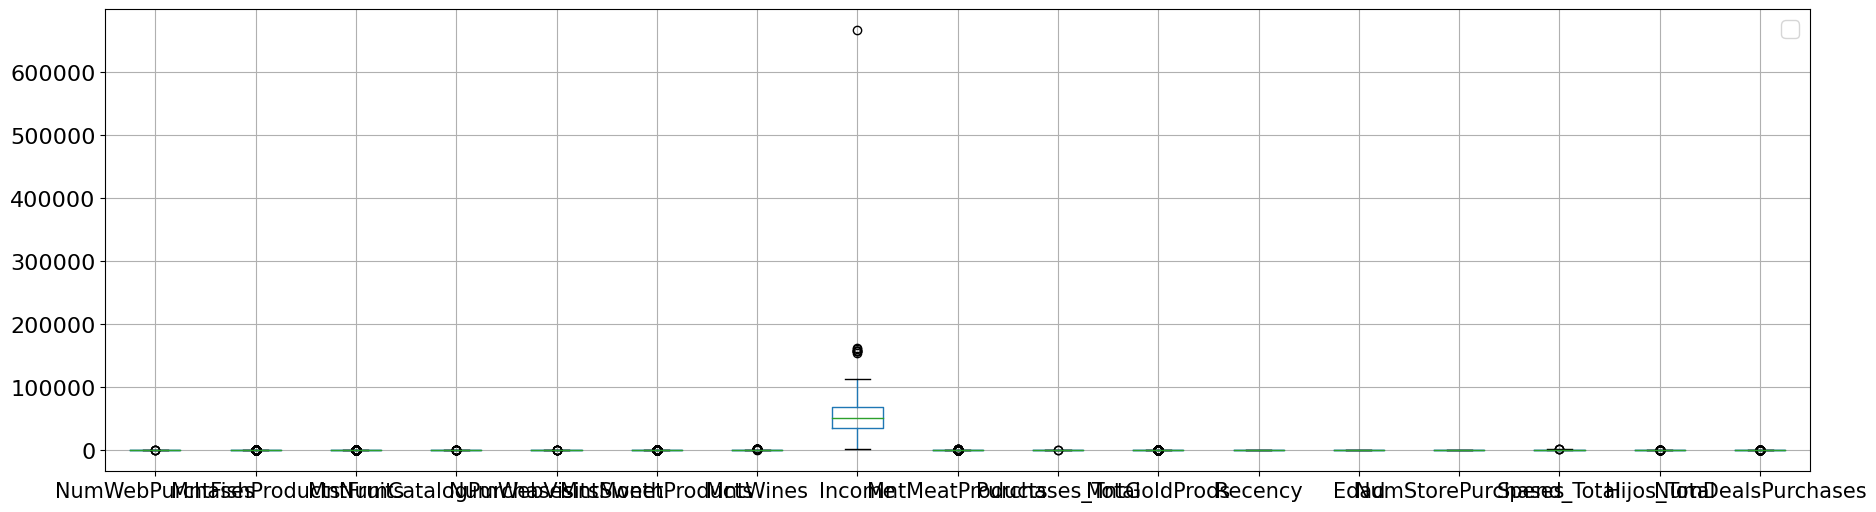

In [ ]:
## **j1. Forma 1. Gráfico de los datos tratados hasta el momento**
plt.figure(figsize=(22,6))
df_marketing3.boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# **j2. Método 2. Graficos de Boxplot para cada variable en diferentes planos**
+ **Vamos a Construir una función que me permita agregar la dat, las variables y los diferentes planos**
 - graficos_boxplot(data,lista,fila,columna,top=1.9,hspace=0.7)

In [ ]:
## **j2. Método 2. Graficos de Boxplot para cada variable en diferentes planos**
def graficos_boxplot(data,lista,fila,columna,top=1.9,hspace=0.7): #top=1.9,hspace=0.7 para que no se junten los graficos
  plt.figure(figsize=(15,6))
  plt.subplots_adjust(top=top,hspace=hspace)
  for i,j in enumerate(sorted(lista)):
    plt.subplot(fila,columna,i+1)
    sns.boxplot(data[j])
    plt.title(f'{j}')
    plt.xlabel('')


## **j3. Método 2. Graficos de Boxplot para cada variable en diferentes planos**
+ Se observa gran presencia de valores atípicos

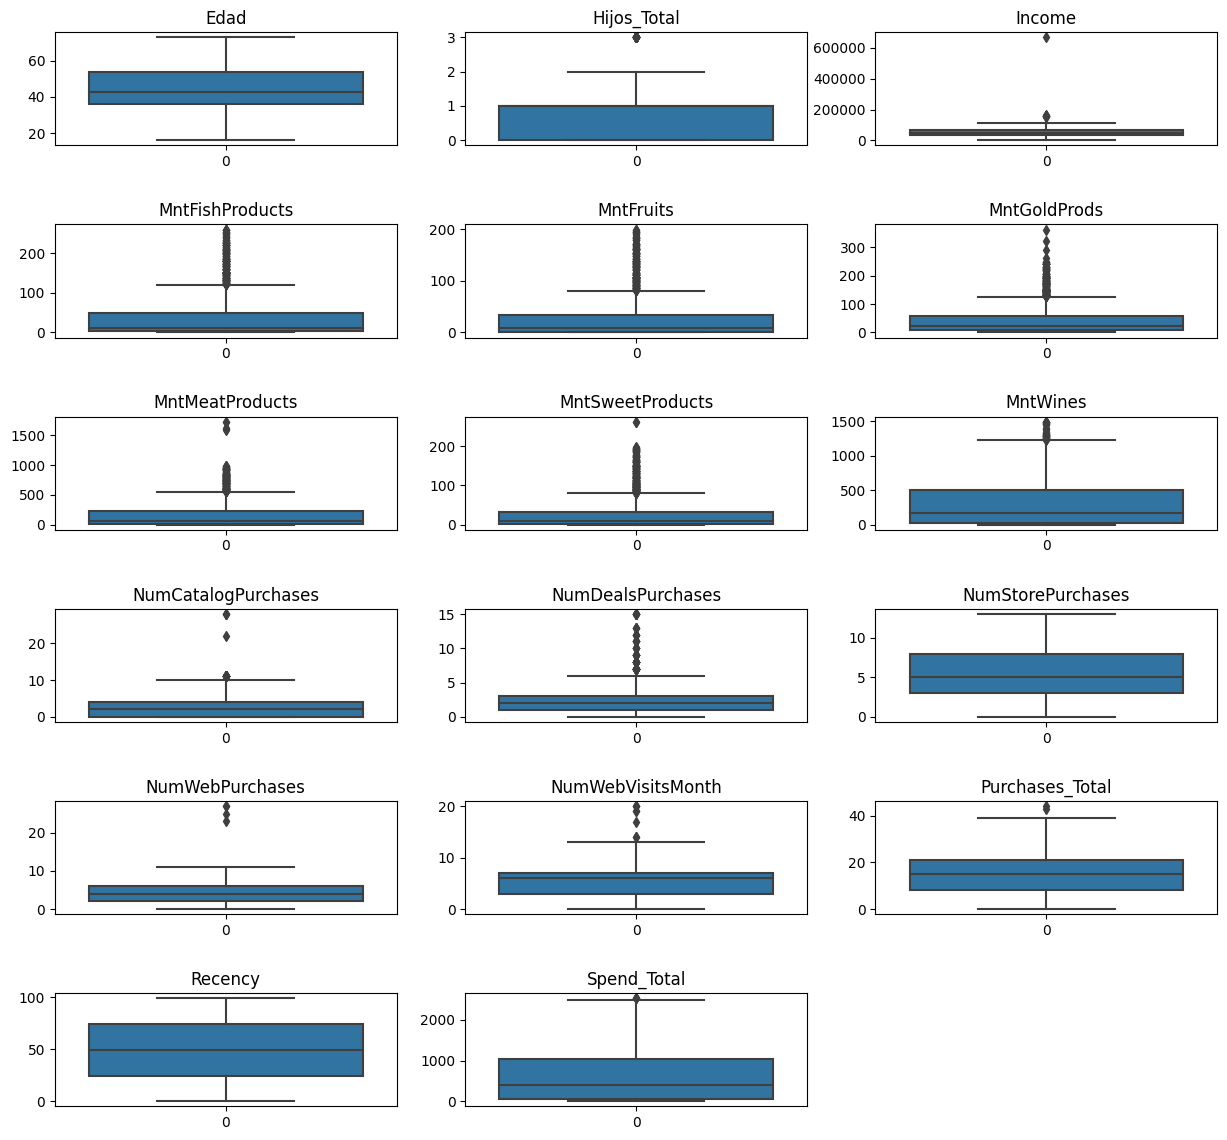

In [ ]:
## **j3. Método 2. Graficos de Boxplot**
graficos_boxplot(df_marketing3,lista_variables_num,6,3)

# **k. Preguntemonos si hay correlación entre las variables**

## **k1. Costruyamos la matriz de correlaciones de los datos**

In [ ]:
## **k1. Costruyamos la matriz de correlaciones de los datos**
df_marketing3.corr()

,NumWebPurchases,MntFishProducts,MntFruits,NumCatalogPurchases,NumWebVisitsMonth,MntSweetProducts,MntWines,Income,MntMeatProducts,Purchases_Total,MntGoldProds,Recency,Edad,NumStorePurchases,Spend_Total,Hijos_Total,NumDealsPurchases
NumWebPurchases,1.000000,0.293681,0.296735,0.378376,-0.055846,0.348544,0.542265,0.380554,0.293761,0.777831,0.421836,-0.010726,0.143785,0.502713,0.519837,-0.146361,0.234185
MntFishProducts,0.293681,1.000000,0.594804,0.534478,-0.446003,0.579870,0.399753,0.437564,0.568402,0.469454,0.422875,0.001079,0.038437,0.459855,0.642818,-0.425503,-0.139361
MntFruits,0.296735,0.594804,1.000000,0.487917,-0.418383,0.567164,0.389637,0.428791,0.543105,0.455461,0.392995,-0.004306,0.010410,0.461758,0.614229,-0.394853,-0.132114
NumCatalogPurchases,0.378376,0.534478,0.487917,1.000000,-0.520364,0.490924,0.635226,0.586826,0.723827,0.735198,0.437697,0.025110,0.120037,0.518738,0.778577,-0.439904,-0.008617
NumWebVisitsMonth,-0.055846,-0.446003,-0.418383,-0.520364,1.000000,-0.423294,-0.320653,-0.549785,-0.539470,-0.312288,-0.250719,-0.021445,-0.131542,-0.428473,-0.500218,0.418419,0.347633
MntSweetProducts,0.348544,0.579870,0.567164,0.490924,-0.423294,1.000000,0.386581,0.436131,0.523846,0.472876,0.369724,0.022670,0.015259,0.448756,0.603016,-0.383137,-0.120100
MntWines,0.542265,0.399753,0.389637,0.635226,-0.320653,0.386581,1.000000,0.576903,0.562667,0.712789,0.387516,0.016064,0.153452,0.642100,0.891839,-0.351909,0.010940
Income,0.380554,0.437564,0.428791,0.586826,-0.549785,0.436131,0.576903,1.000000,0.577805,0.563450,0.321938,-0.004061,0.163013,0.526600,0.664775,-0.290858,-0.082315
MntMeatProducts,0.293761,0.568402,0.543105,0.723827,-0.539470,0.523846,0.562667,0.577805,1.000000,0.554229,0.350609,0.023056,0.026002,0.479659,0.842965,-0.502208,-0.122415
Purchases_Total,0.777831,0.469454,0.455461,0.735198,-0.312288,0.472876,0.712789,0.563450,0.554229,1.000000,0.493314,0.005740,0.168592,0.820259,0.753903,-0.245790,0.362334


## **k2. Es mucho mejor realizar el Triangulo de correlación y mapa de calor - Heatmap**
+ **La evidencia de una fuerte correlacion entre las variables es un indicio de que hay que usar el métodos de componentes principales**

<ipython-input-40-5917156569b5>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_marketing3.corr(), dtype=np.bool))


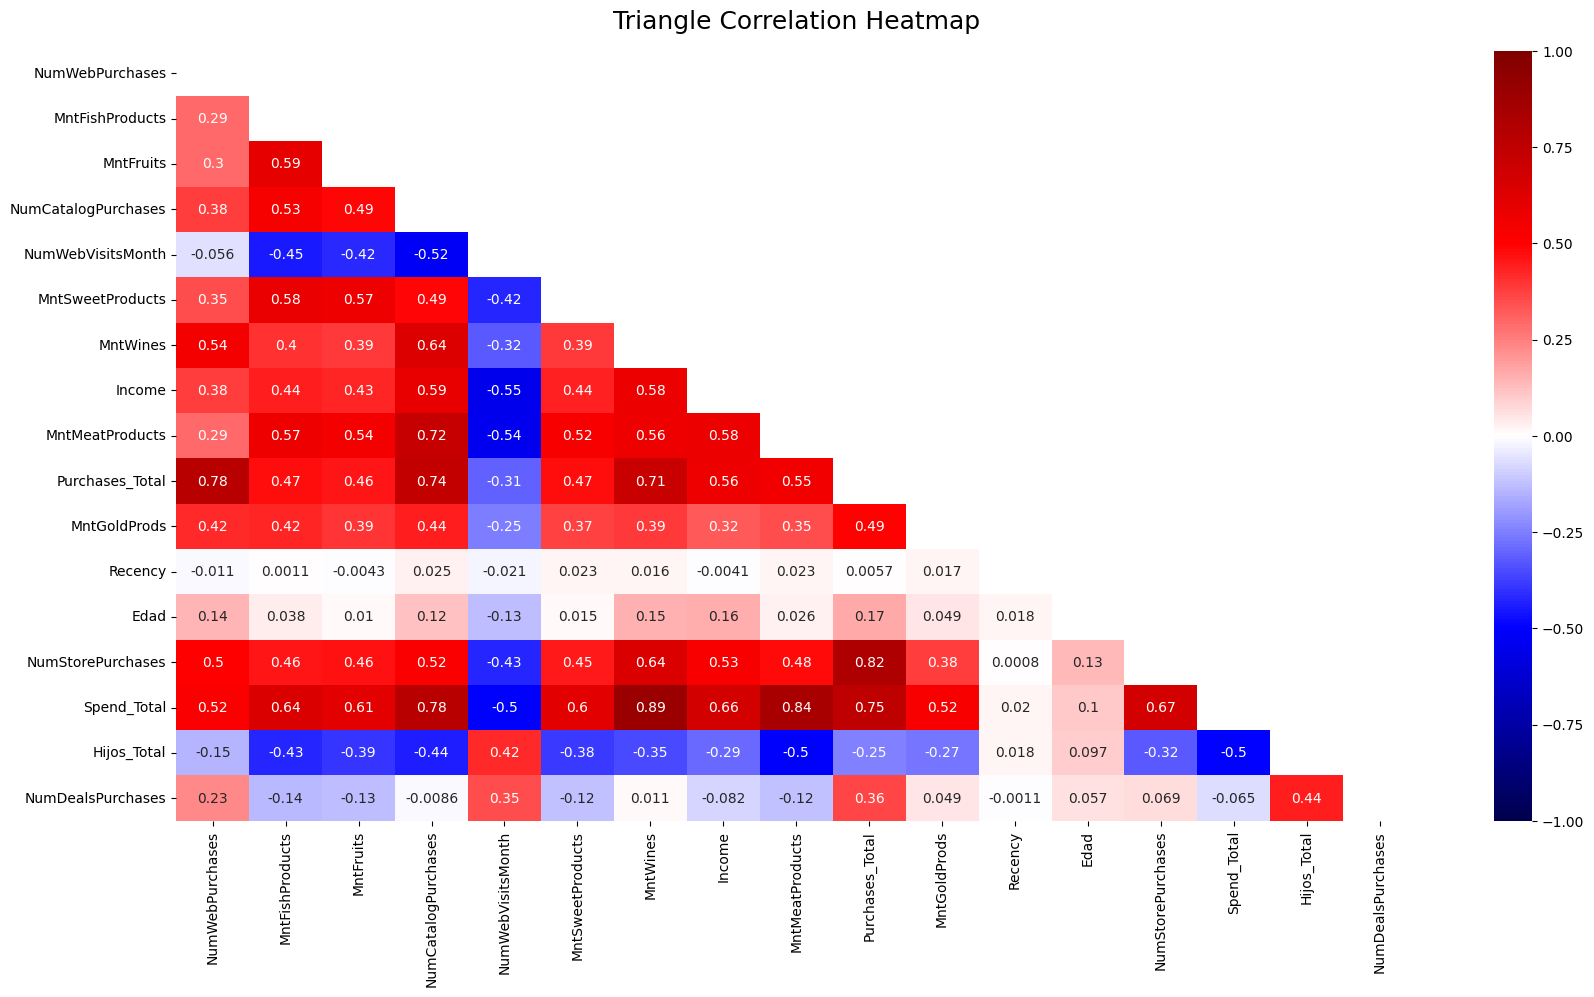

In [ ]:
## **k2. Triangulo de correlación y mapa de calor - Heatmap**
plt.figure(figsize=(20,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_marketing3.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_marketing3.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

# **221. Parte II Ejemplo 1.  Análisis de Componentes Princiapales (PCA) y Cluster - Análisis Exploratorio de Datos**

# **a. Es Necesario hacer una limpieza de los datos- Usando Método de Percentil**
+ Limpieza del percentil superior 97%
+ Limpieza del percentil inferior 3%
+ Usaremos solos las variables que evidencias muchos datos atipicos

## **a1. Construyamos una funcion que nos ayude con la limpieza eliminando los valores atipicos**

In [ ]:
## **a1. Construyamos una funcion que nos ayude con la limpieza eliminando los valores atipicos**
def atipicos(x,qmax,qmin):
  x_atip = x.copy() # Valor mdificado
  quanSuperior = x_atip.quantile(qmax) # Hallamos el Cuantil superior de la variable escogida
  quanInferior = x_atip.quantile(qmin) # Hallamos el Cuantil superior de la variable escogida

  x_atip[x_atip>quanSuperior] = quanSuperior
  x_atip[x_atip<quanInferior] = quanInferior
  return x_atip

## **a2. Recordemos nuestras columnas de la base de datos**

In [ ]:
## **a2. Recordemos nuestras columnas de la base de datos**
df_marketing3.columns

Index(['NumWebPurchases', 'MntFishProducts', 'MntFruits',
       'NumCatalogPurchases', 'NumWebVisitsMonth', 'MntSweetProducts',
       'MntWines', 'Income', 'MntMeatProducts', 'Purchases_Total',
       'MntGoldProds', 'Recency', 'Edad', 'NumStorePurchases', 'Spend_Total',
       'Hijos_Total', 'NumDealsPurchases'],
      dtype='object')

## **a3. Lista de variables que no presentan valores atipicos segun Box_Plot**

In [ ]:
## **a3. Lista de variables que no presentan valores atipicos segun Box_Plot**
lista_variables_limpias = ['Edad', 'Recency', 'NumStorePurchases','Hijos_Total',
                           'Spend_Total','Purchases_Total']
lista_variables_limpias

['Edad',
 'Recency',
 'NumStorePurchases',
 'Hijos_Total',
 'Spend_Total',
 'Purchases_Total']

## **a4. Lista de variables que  presentan valores atipicos segun Box_Plot**

In [ ]:
## **a4. Lista de variables que  presentan valores atipicos segun Box_Plot**
lista_variables_Tratar = [a for a in lista_variables_num if a not in lista_variables_limpias]
lista_variables_Tratar

['NumWebPurchases',
 'MntFishProducts',
 'MntFruits',
 'NumCatalogPurchases',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntWines',
 'Income',
 'MntMeatProducts',
 'MntGoldProds',
 'NumDealsPurchases']

## **a5. Cantidad de Variables a limpiar**

In [ ]:
## **a5. Cantidad de Variables a limpiar**
len(lista_variables_Tratar) # De variables a tratar

11

# **b. Renombramos nuevamente nuestra base de datos para hacer la limpieza**

+ Construios un nuevo DataFrame que contenga las variables limpias y que agrege aquellas variables que son modificadas por el metodo del percentil.


## **b1. Aplicamos la función de limpieza arriba a los datos y construimos nuestra nueva base de datos con este criterio**

In [ ]:
## **b1. Aplicamos la función de limpieza arriba a los datos y construimos nuestra nueva base de datos con este criterio**
df_marketing4 = df_marketing3[lista_variables_limpias].copy() # Este es el nuevo dataFrame que vamos a usar
for i in lista_variables_Tratar:
  df_marketing4[f'{i}_mod'] = atipicos(df_marketing3[i],0.97,0.03) #Se van almacenar las variables mofificadas

In [ ]:
## **b2. Comprobamos que tan bueno fue el cambio**
df_marketing4

,Edad,Recency,NumStorePurchases,Hijos_Total,Spend_Total,Purchases_Total,NumWebPurchases_mod,MntFishProducts_mod,MntFruits_mod,NumCatalogPurchases_mod,NumWebVisitsMonth_mod,MntSweetProducts_mod,MntWines_mod,Income_mod,MntMeatProducts_mod,MntGoldProds_mod,NumDealsPurchases_mod
0,55.0,58,4,0,1617,25,8,172.0,88,10,7,88.0,635,58138.0,546.0,88,3
1,60.0,38,2,2,27,6,1,2.0,1,1,5,1.0,11,46344.0,6.0,6,2
2,48.0,26,10,0,776,21,8,111.0,49,2,4,21.0,426,71613.0,127.0,42,1
3,30.0,26,4,1,53,8,2,10.0,4,0,6,3.0,11,26646.0,20.0,5,2
4,33.0,94,6,1,422,19,5,46.0,43,3,5,27.0,173,58293.0,118.0,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,46.0,46,4,1,1341,18,9,42.0,43,3,5,118.0,709,61223.0,182.0,187,2
2236,68.0,56,5,3,444,22,8,0.0,0,2,7,0.0,406,64014.0,30.0,8,7
2237,33.0,91,13,0,1241,19,2,32.0,48,3,6,12.0,908,56981.0,217.0,24,1
2238,58.0,8,10,1,843,23,6,80.0,30,5,3,30.0,428,69245.0,214.0,61,2


## **b3. Forma 1. Gráfico de los datos tratados hasta el momento - Con la base modificada**
+ Se nota que el cambio no fue mayor

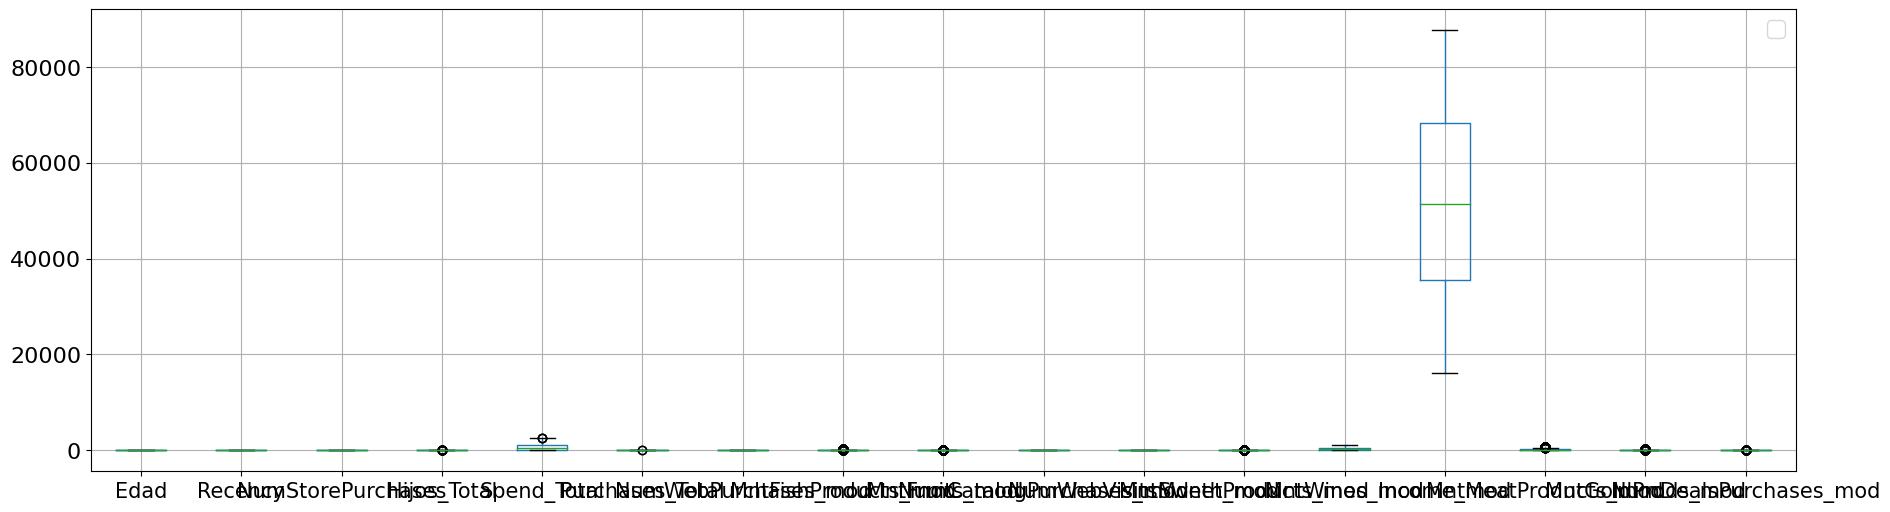

In [ ]:
## **b3. Forma 1. Gráfico de los datos tratados hasta el momento - Con la base modificada**
plt.figure(figsize=(22,6))
df_marketing4.boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## **b4. Usemos la función creada en _j2_ para una mejor visualización de los graficos**

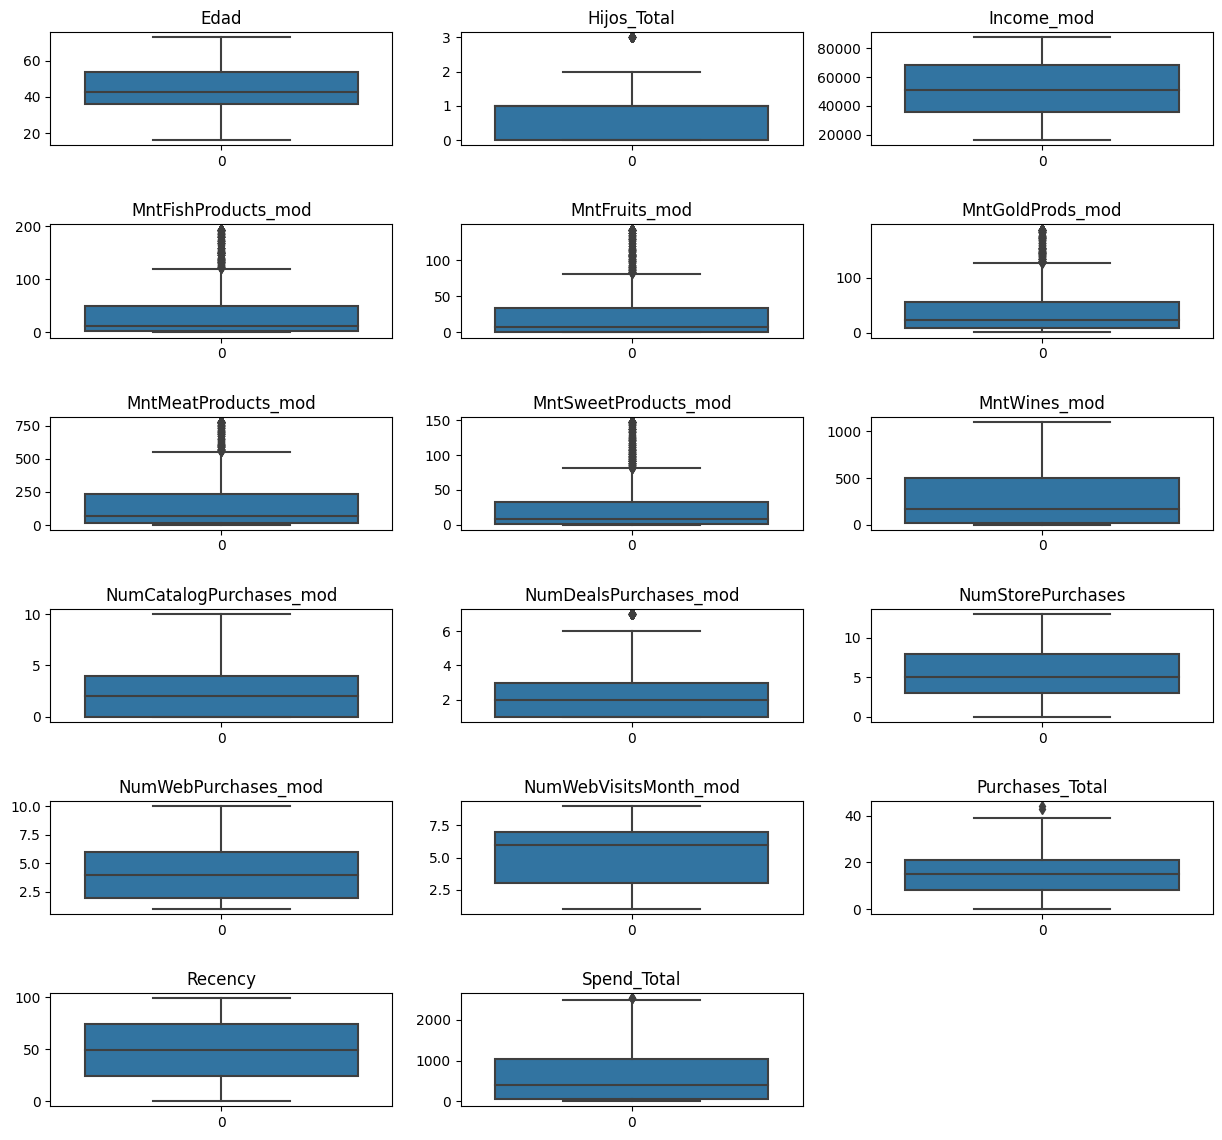

In [ ]:
## **b4. Usemos la función creada en _j2_ para una mejor visualización de los graficos**
graficos_boxplot(df_marketing4,set(df_marketing4.columns),6,3)

# **c. Dado que permanece aun variables con los mismos problemas vamos hacer una transformación de estos datos - Transformación Logaritmica**

## **c1. nuestras variables a transformar**

In [ ]:
## **c1. nuestras variables a transformar**
df_marketing4.columns

Index(['Edad', 'Recency', 'NumStorePurchases', 'Hijos_Total', 'Spend_Total',
       'Purchases_Total', 'NumWebPurchases_mod', 'MntFishProducts_mod',
       'MntFruits_mod', 'NumCatalogPurchases_mod', 'NumWebVisitsMonth_mod',
       'MntSweetProducts_mod', 'MntWines_mod', 'Income_mod',
       'MntMeatProducts_mod', 'MntGoldProds_mod', 'NumDealsPurchases_mod'],
      dtype='object')

## **c2. Creamos la lista de variables a transformar mediante logaritmo**

In [ ]:
## **c2. Creamos la lista de variables a transformar**
Lista_Transformar = ['MntFishProducts_mod','MntGoldProds_mod','MntMeatProducts_mod',
                     'MntSweetProducts_mod','MntFruits_mod']
Lista_Transformar

['MntFishProducts_mod',
 'MntGoldProds_mod',
 'MntMeatProducts_mod',
 'MntSweetProducts_mod',
 'MntFruits_mod']

## **c3. Creamos la base de datos con las variables transformadas con el logaritmo de primero**

In [ ]:
## **c3. Creamos la base de datos con las variables transformadas con el logaritmo de primero**
df_marketing5 = df_marketing4[Lista_Transformar].apply(np.log1p).rename(columns = lambda x: 'log_'+x)
df_marketing5

,log_MntFishProducts_mod,log_MntGoldProds_mod,log_MntMeatProducts_mod,log_MntSweetProducts_mod,log_MntFruits_mod
0,5.153292,4.488636,6.304449,4.488636,4.488636
1,1.098612,1.945910,1.945910,0.693147,0.693147
2,4.718499,3.761200,4.852030,3.091042,3.912023
3,2.397895,1.791759,3.044522,1.386294,1.609438
4,3.850148,2.772589,4.779123,3.332205,3.784190
...,...,...,...,...,...
2235,3.761200,5.236442,5.209486,4.779123,3.784190
2236,0.000000,2.197225,3.433987,0.000000,0.000000
2237,3.496508,3.218876,5.384495,2.564949,3.891820
2238,4.394449,4.127134,5.370638,3.433987,3.433987


## **c4. Concatenamos ahora los dos DataFrame hasta el momento**


In [ ]:
# **c4. Concatenamos ahora los dos DataFrame hasta el momento**
df_marketing6 = pd.concat([df_marketing4.drop(Lista_Transformar,axis=1),df_marketing5],axis=1)
df_marketing6

,Edad,Recency,NumStorePurchases,Hijos_Total,Spend_Total,Purchases_Total,NumWebPurchases_mod,NumCatalogPurchases_mod,NumWebVisitsMonth_mod,MntWines_mod,Income_mod,NumDealsPurchases_mod,log_MntFishProducts_mod,log_MntGoldProds_mod,log_MntMeatProducts_mod,log_MntSweetProducts_mod,log_MntFruits_mod
0,55.0,58,4,0,1617,25,8,10,7,635,58138.0,3,5.153292,4.488636,6.304449,4.488636,4.488636
1,60.0,38,2,2,27,6,1,1,5,11,46344.0,2,1.098612,1.945910,1.945910,0.693147,0.693147
2,48.0,26,10,0,776,21,8,2,4,426,71613.0,1,4.718499,3.761200,4.852030,3.091042,3.912023
3,30.0,26,4,1,53,8,2,0,6,11,26646.0,2,2.397895,1.791759,3.044522,1.386294,1.609438
4,33.0,94,6,1,422,19,5,3,5,173,58293.0,5,3.850148,2.772589,4.779123,3.332205,3.784190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,46.0,46,4,1,1341,18,9,3,5,709,61223.0,2,3.761200,5.236442,5.209486,4.779123,3.784190
2236,68.0,56,5,3,444,22,8,2,7,406,64014.0,7,0.000000,2.197225,3.433987,0.000000,0.000000
2237,33.0,91,13,0,1241,19,2,3,6,908,56981.0,1,3.496508,3.218876,5.384495,2.564949,3.891820
2238,58.0,8,10,1,843,23,6,5,3,428,69245.0,2,4.394449,4.127134,5.370638,3.433987,3.433987


## **c5. Forma 1. Gráfico de los datos tratados hasta el momento - Con la base modificada**
+ Se observa que ya desaparecieron los valores atipicos, ahora nos toca escalarlos

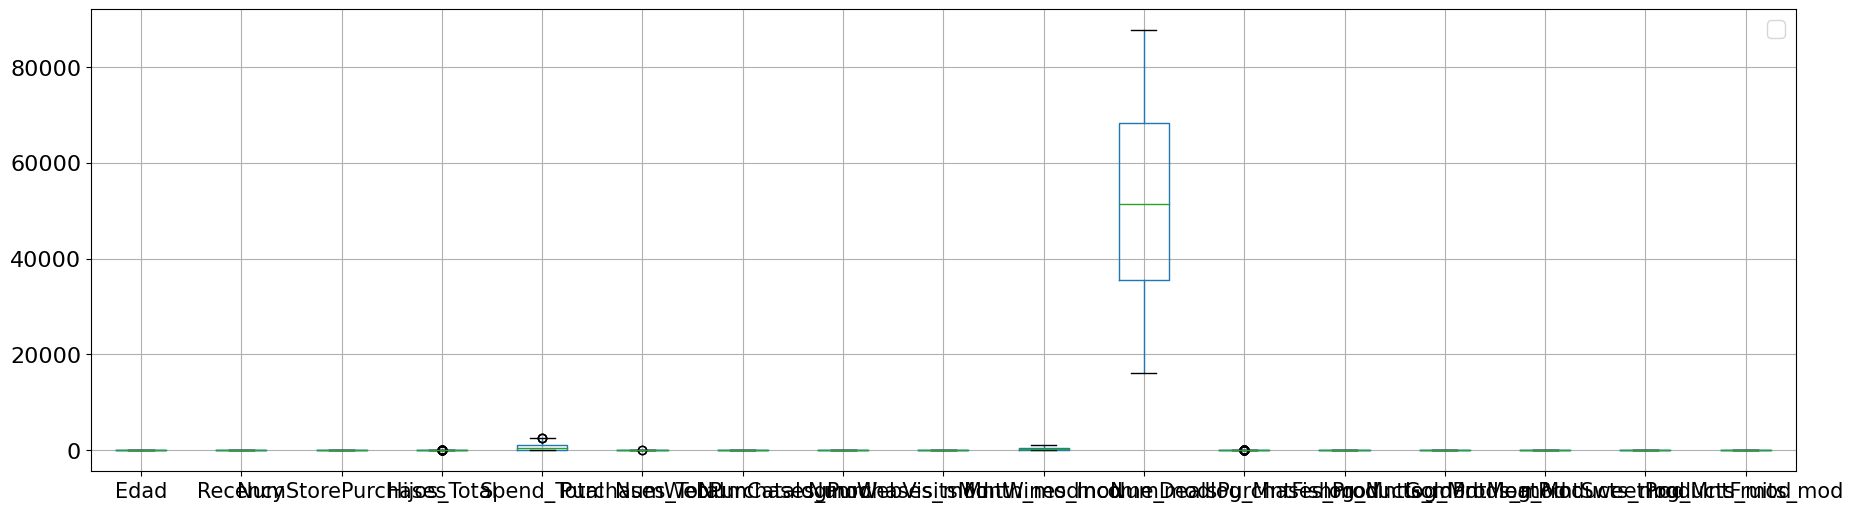

In [ ]:
## **c5. Forma 1. Gráfico de los datos tratados hasta el momento - Con la base modificada**
plt.figure(figsize=(22,6))
df_marketing6.boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# **c6. Renombramos ahora nuestro DataFrame y hacemos el grafico co las variables transformadas**

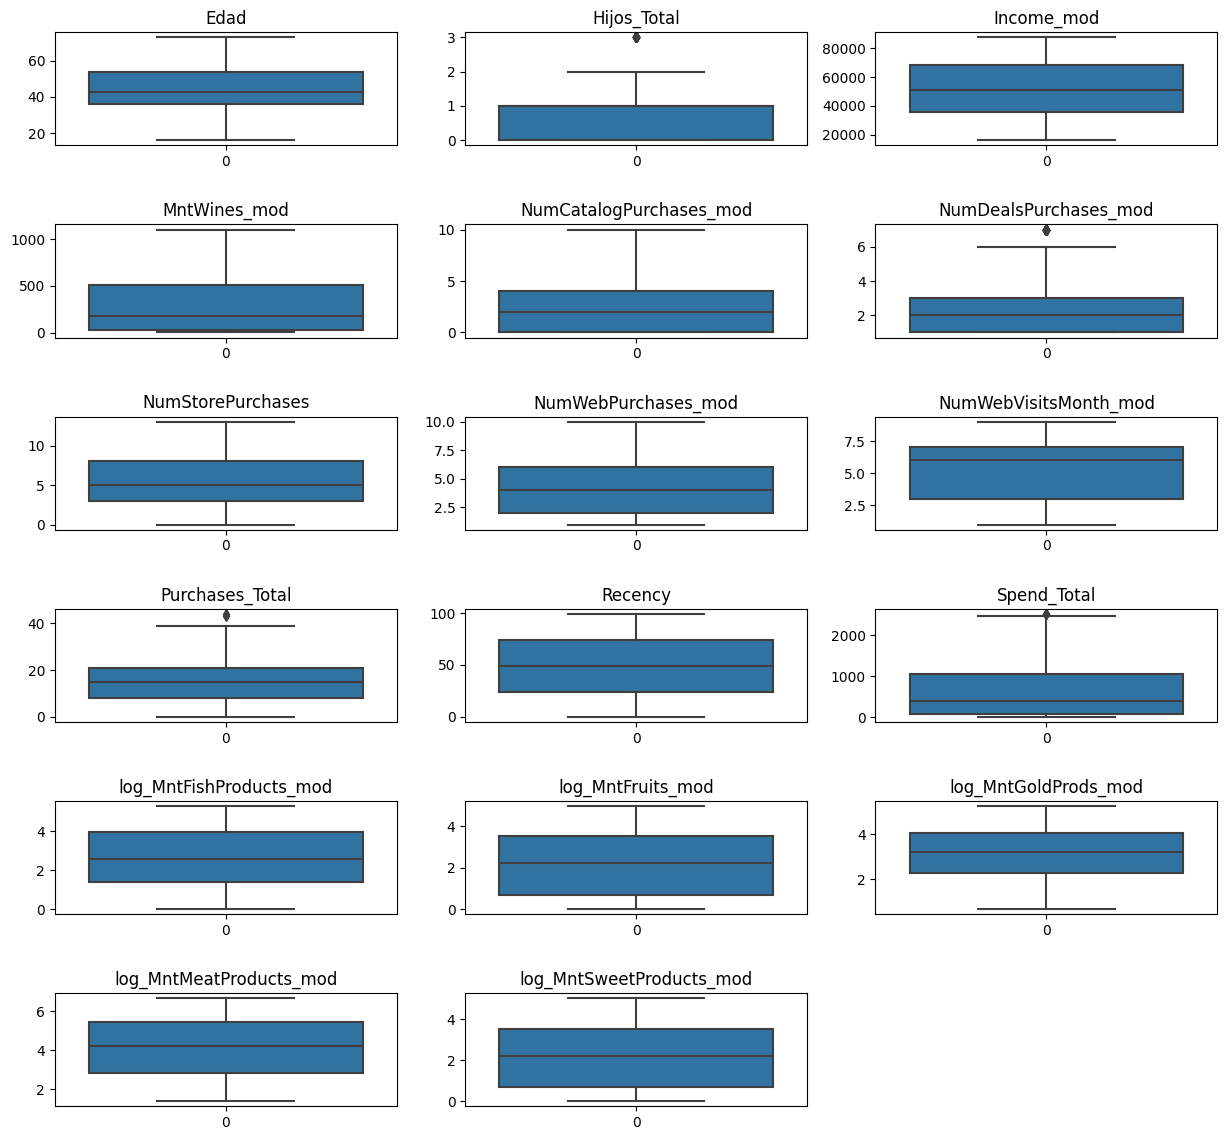

In [ ]:
# **c6. Renombramos ahora nuestro DataFrame y hacemos el grafico co las variables transformadas**
graficos_boxplot(df_marketing6,set(df_marketing6.columns),6,3)

# **223. Parte III Ejemplo 1. Reduccion de la Dimensión -  Análisis de Componentes Princiapales (PCA) y Cluster - Análisis Exploratorio de Datos**

# **a. Un poco de Álgebra lineal para saber de su importancia en el aprendizaje**

## **a1. Matriz de covarianza**

In [ ]:
## **a1. Matriz de covarianza**
df_marketing6.cov()

,Edad,Recency,NumStorePurchases,Hijos_Total,Spend_Total,Purchases_Total,NumWebPurchases_mod,NumCatalogPurchases_mod,NumWebVisitsMonth_mod,MntWines_mod,Income_mod,NumDealsPurchases_mod,log_MntFishProducts_mod,log_MntGoldProds_mod,log_MntMeatProducts_mod,log_MntSweetProducts_mod,log_MntFruits_mod
Edad,137.621371,6.145370,5.088227,0.856108,7.415741e+02,15.183782,4.529002,4.348314,-3.733793,5.917000e+02,4.961219e+04,1.289147,0.326166,0.750616,1.856697,-0.190448,0.296196
Recency,6.145370,838.823673,0.075215,0.393095,3.563981e+02,1.276372,-0.464737,2.389055,-1.439133,1.630288e+02,3.779218e+03,0.258479,0.783010,0.731561,1.236194,1.079872,1.114204
NumStorePurchases,5.088227,0.075215,10.568729,-0.784855,1.320925e+03,20.472160,4.563603,5.084114,-3.195308,6.943876e+02,4.378221e+04,0.413595,2.832539,1.964428,3.563590,2.807231,2.745094
Hijos_Total,0.856108,0.393095,-0.784855,0.565207,-2.258827e+02,-1.418630,-0.303443,-0.945835,0.764097,-8.682147e+01,-5.305446e+03,0.575023,-0.588860,-0.292211,-0.542400,-0.535797,-0.536143
Spend_Total,741.574050,356.398141,1320.925485,-225.882715,3.627042e+05,3485.725167,854.145528,1331.355112,-711.334280,1.747219e+05,9.921772e+06,-80.547075,638.774170,429.242017,809.748142,604.087861,605.885898
Purchases_Total,15.183782,1.276372,20.472160,-1.418630,3.485725e+03,58.938979,15.864827,15.734636,-5.533023,1.814018e+03,1.071469e+05,4.419758,6.967243,5.726786,9.450261,6.836106,6.636454
NumWebPurchases_mod,4.529002,-0.464737,4.563603,-0.303443,8.541455e+02,15.864827,6.549845,3.179988,-0.172898,4.920792e+02,2.649122e+04,1.260154,1.676896,1.667255,2.406109,1.652069,1.652252
NumCatalogPurchases_mod,4.348314,2.389055,5.084114,-0.945835,1.331355e+03,15.734636,3.179988,7.479008,-3.430405,6.156237e+02,4.011413e+04,-0.321048,2.699848,1.804497,3.247971,2.517983,2.469121
NumWebVisitsMonth_mod,-3.733793,-1.439133,-3.195308,0.764097,-7.113343e+02,-5.533023,-0.172898,-3.430405,5.272889,-2.503381e+02,-3.007536e+04,1.354058,-1.770445,-0.742791,-1.798667,-1.673293,-1.635818
MntWines_mod,591.699986,163.028752,694.387625,-86.821468,1.747219e+05,1814.018208,492.079221,615.623732,-250.338081,1.046554e+05,4.767581e+06,10.251125,240.022439,189.936800,357.076311,232.999682,232.853707


## **a2. Valores propios de la matriz de covarianza**

In [ ]:
## **a2. Valores propios de la matriz de covarianza**
from numpy.linalg import eig
valores, vectores = eig(df_marketing6.cov())
print(pd.DataFrame({'valores_propios':valores}))


    valores_propios
0      4.037101e+08
1      1.507756e+05
2      1.612110e+04
3      8.382710e+02
4      1.269644e+02
5      2.938899e+01
6      4.759215e+00
7      3.158285e+00
8      2.445985e+00
9      1.650004e+00
10     1.418882e+00
11     1.702971e-01
12     2.485044e-01
13     3.154229e-01
14     7.228915e-01
15     8.109831e-01
16     7.933642e-01


## **a3. Vectores propios de la matriz de covarianza**

In [ ]:
## **a3. Vectores propios de la matriz de covarianza**

vectores = eig(df_marketing6.cov())

print({'vectores_propios':vectores})

{'vectores_propios': (array([4.03710147e+08, 1.50775579e+05, 1.61211041e+04, 8.38271009e+02,
       1.26964422e+02, 2.93889947e+01, 4.75921509e+00, 3.15828477e+00,
       2.44598516e+00, 1.65000426e+00, 1.41888205e+00, 1.70297123e-01,
       2.48504424e-01, 3.15422864e-01, 7.22891508e-01, 8.10983109e-01,
       7.93364195e-01]), array([[-1.22907397e-04, -2.75642494e-03,  1.49235134e-02,
        -9.65238274e-03, -9.98800178e-01, -4.03447936e-02,
         4.28875015e-03, -1.32031948e-02,  9.20177957e-03,
         3.02939902e-03,  1.02769306e-02, -1.39962814e-04,
         5.27860278e-03, -2.60959655e-03, -7.79175708e-04,
         4.41637015e-03, -1.49430692e-04],
       [-9.38423782e-06,  1.91764053e-03, -1.66433644e-03,
        -9.99944069e-01,  9.54869670e-03,  2.43263346e-03,
        -8.89233725e-04, -1.80127183e-03, -6.73265363e-04,
        -1.45732077e-03, -4.83778423e-06, -2.58124269e-04,
         1.12081299e-03,  3.05992164e-04,  7.98525680e-05,
        -1.83720872e-04, -4.96459992

# **b. Escalamos los Datos**

## **b1. Nuestro datos hasta el momento**

In [ ]:
## **b1. Nuestro datos hasta el momento**

df_marketing6.columns

Index(['Edad', 'Recency', 'NumStorePurchases', 'Hijos_Total', 'Spend_Total',
       'Purchases_Total', 'NumWebPurchases_mod', 'NumCatalogPurchases_mod',
       'NumWebVisitsMonth_mod', 'MntWines_mod', 'Income_mod',
       'NumDealsPurchases_mod', 'log_MntFishProducts_mod',
       'log_MntGoldProds_mod', 'log_MntMeatProducts_mod',
       'log_MntSweetProducts_mod', 'log_MntFruits_mod'],
      dtype='object')

## **b2. Estandarizamos o escalamos las variables para datos_test**

In [ ]:
## **b2. Estandarizamos o escalamos las variables para datos_test**

from sklearn.preprocessing import StandardScaler,MinMaxScaler # Nuestra libreria para el PCA
std = StandardScaler() # Objeto de la clase StandarScaler tomara por defecto with_mean =0(True) y with_std =1(True)
trans = MinMaxScaler()
df_marketing6_std = std.fit_transform(df_marketing6) # Escalamiento con media =0 y std =1

df_marketing6_trans = std.fit_transform(df_marketing6) # Escalamiento con Maximo y Minimo

print('Datos Escalados con media =0 y std = 1',df_marketing6_std)

print('Datos Escalados con Maximo y Minimo',df_marketing6_trans)

Datos Escalados con media =0 y std = 1 [[ 0.92725913  0.30703926 -0.55078479 ...  1.41522551  1.42103436
   1.44375446]
 [ 1.35356766 -0.38366418 -1.1661254  ... -1.42284708 -0.97244165
  -0.9869217 ]
 [ 0.33042718 -0.79808624  1.29523705 ...  0.4694798   0.53969671
   1.07448444]
 ...
 [-0.94849843  1.44669994  2.21824797 ...  0.81619549  0.20793679
   1.06154639]
 [ 1.18304425 -1.41971934  1.29523705 ...  0.80717245  0.75596134
   0.76834466]
 [ 1.18304425 -0.31459383 -0.55078479 ... -0.00253784 -0.97244165
  -0.54302205]]
Datos Escalados con Maximo y Minimo [[ 0.92725913  0.30703926 -0.55078479 ...  1.41522551  1.42103436
   1.44375446]
 [ 1.35356766 -0.38366418 -1.1661254  ... -1.42284708 -0.97244165
  -0.9869217 ]
 [ 0.33042718 -0.79808624  1.29523705 ...  0.4694798   0.53969671
   1.07448444]
 ...
 [-0.94849843  1.44669994  2.21824797 ...  0.81619549  0.20793679
   1.06154639]
 [ 1.18304425 -1.41971934  1.29523705 ...  0.80717245  0.75596134
   0.76834466]
 [ 1.18304425 -0.314593

# **c. Componentes Principales - con StandardScaler**
+ No importa el método ya sea StandarScaler o MinMax, los resultados son los mismos

## **c1. Usamos la libreria donde esta la componente principal - con StandardScaler**

In [ ]:
## **c1. Usamos la libreria donde esta la componente principal**
from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

pca = PCA()

# Obtenemos los componentes principales

df_marketing6_std_pca = pca.fit(df_marketing6_std) # hace lo solicitado a la base de datos

# veamos lo que hizo
df_marketing6_std_pca

PCA()

## **c2. Cuanta varianza corresponde a cada componente**

In [ ]:
# **c2. Cuanta varianza corresponde a cada componente**
df_marketing6_std_pca.explained_variance_ratio_.shape # nos muestra la misma cantidad de variables

(17,)

## **c3. Cuanta varianza corresponde a cada componente**

In [ ]:
## **c3. Cuanta varianza corresponde a cada componente**
print(df_marketing6_std_pca.explained_variance_ratio_) # nos muestra la misma cantidad de variables

[0.49960601 0.11902056 0.06978101 0.05918631 0.04846006 0.03832713
 0.02815721 0.02466287 0.0232391  0.01937286 0.01825934 0.01764391
 0.01490605 0.00998961 0.00628324 0.00232801 0.0007767 ]


## **c4. Varianza y varianza acumulada por las nuevas componentes principales**

In [ ]:
## **c4. Varianza y varianza acumulada por las nuevas componentes principales**
var_exp1 = pd.DataFrame({'Varianza':df_marketing6_std_pca.explained_variance_ratio_, 'Varianza_acumulada':np.cumsum(df_marketing6_std_pca.explained_variance_ratio_)})
var_exp1

,Varianza,Varianza_acumulada
0,0.499606,0.499606
1,0.119021,0.618627
2,0.069781,0.688408
3,0.059186,0.747594
4,0.048460,0.796054
5,0.038327,0.834381
6,0.028157,0.862538
7,0.024663,0.887201
8,0.023239,0.910440
9,0.019373,0.929813


## **c5. Cuanta varianza corresponde a cada componente**

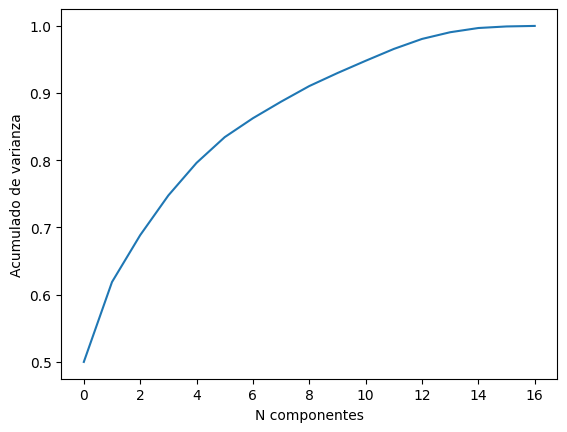

In [ ]:
## **c5. Cuanta varianza corresponde a cada componente**
var_exp2 = np.cumsum(df_marketing6_std_pca.explained_variance_ratio_)# Esta es la varianza explicada
plt.plot(var_exp2)
plt.xlabel('N componentes')
plt.ylabel('Acumulado de varianza')
plt.show()

# **c6. Queremos saber cuantas componentes necesitamos**

In [ ]:
# **c6. Queremos saber cuantas componentes necesitamos**
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 70%', np.where((var_exp2>0.6)&(var_exp2<0.7)))
print('Cuantas componentes me explican mas del 70% de la varianza pero menos del 80%', np.where((var_exp2>0.7)&(var_exp2<0.8)))
print('Cuantas componentes me explican mas del 80% de la varianza pero menos del 90%', np.where((var_exp2>0.8)&(var_exp2<0.90)))

Cuantas componentes me explican mas del 60% de la varianza pero menos del 70% (array([1, 2]),)
Cuantas componentes me explican mas del 70% de la varianza pero menos del 80% (array([3, 4]),)
Cuantas componentes me explican mas del 80% de la varianza pero menos del 90% (array([5, 6, 7]),)


# **d. Componentes Principales - con MinMaxScaler()**
+ No importa el método ya sea StandarScaler o MinMax, los resultados son los mismos

## **d1. Estandarizamos o escalamos las variables para datos_test**

In [ ]:
## **d1. Estandarizamos o escalamos las variables para datos_test**
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler # Nuestra libreria para el PCA

trans = MinMaxScaler()
df_marketing6_trans = trans.fit_transform(df_marketing6)

## **d2. Creamos un gráfico para que nos diga cuantas componentes queremos**

In [ ]:
## **d2. Creamos un gráfico para que nos diga cuantas componentes queremos**

df_marketing6_trans_pca = PCA().fit(df_marketing6_trans) # n_components = 2


## **d3. Cuanta varianza corresponde a cada componente**

In [ ]:
## **d3. Cuanta varianza corresponde a cada componente**
ar_varianza = df_marketing6_trans_pca.explained_variance_ratio_ # nos muestra la misma cantidad de variables
ar_varianza

array([5.06350744e-01, 1.11680130e-01, 6.89214826e-02, 6.73171082e-02,
       4.35373147e-02, 2.97968715e-02, 2.78688168e-02, 2.44970768e-02,
       2.41323958e-02, 2.27258175e-02, 2.02402270e-02, 1.89490333e-02,
       1.39298610e-02, 1.10973865e-02, 6.58984889e-03, 1.95988985e-03,
       4.05995009e-04])

## **d4. Cuanta varianza corresponde a cada componente**

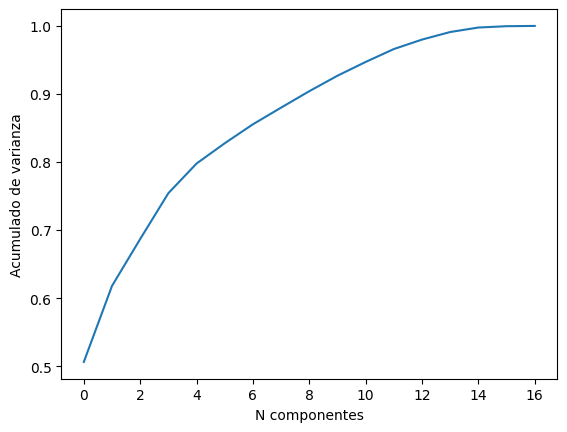

In [ ]:
## **d4. Cuanta varianza corresponde a cada componente**
plt.plot(np.cumsum(ar_varianza))
plt.xlabel('N componentes')
plt.ylabel('Acumulado de varianza')
plt.show()

## **d5. Varianza acumulada**

In [ ]:
## **d5. Varianza acumulada**
np.cumsum(ar_varianza)

array([0.50635074, 0.61803087, 0.68695236, 0.75426947, 0.79780678,
       0.82760365, 0.85547247, 0.87996955, 0.90410194, 0.92682776,
       0.94706799, 0.96601702, 0.97994688, 0.99104427, 0.99763412,
       0.999594  , 1.        ])

# **e. Transformación de los datos**
+ Ya conocemos que no hay diferencia en los metodos para scalar los datos
+ Y sabemos que se necesitan de $n=5$ componentes principales para tener un 80 % de la varianza Explicada

## **e1. Transformar los datos para las $n=5$ componentes**

In [ ]:
## **e1. Transformar los datos para las $n=5$ componentes**
pca = PCA(5)
df_marketing7 = pca.fit_transform(df_marketing6_trans)
df_marketing7

array([[ 1.1961395 ,  0.23869729, -0.29824645,  0.01306537,  0.28800961],
       [-0.90985153, -0.13152481,  0.26721704, -0.01367675, -0.3651393 ],
       [ 0.77338864, -0.09782929, -0.05132463, -0.28986962,  0.10342651],
       ...,
       [ 0.65994171, -0.1838795 ,  0.00554262,  0.39949811,  0.40468393],
       [ 0.81137281,  0.01306081,  0.09830201, -0.39433345, -0.29129666],
       [-0.5552933 ,  0.2674535 ,  0.14918512, -0.03150708, -0.23004295]])

## **e2. Verificamos que los $n=5$ componentes principales explican el 80% de la Variabilidad**

In [ ]:
# **e2. Verificamos que los $n=5$ componentes principales explican el 80% de la Variabilidad
sum (pca.explained_variance_ratio_)

0.7978067801030946

## **e3. DataFrame de  nuestas componentes principales**

In [ ]:
## **e3. DataFrame de  nuestas componentes principales**
df_comp_prin = pd.DataFrame(df_marketing7, columns=['PC1','PC2','PC3','PC4','PC5'])
df_comp_prin

,PC1,PC2,PC3,PC4,PC5
0,1.196140,0.238697,-0.298246,0.013065,0.288010
1,-0.909852,-0.131525,0.267217,-0.013677,-0.365139
2,0.773389,-0.097829,-0.051325,-0.289870,0.103427
3,-0.696627,-0.209597,-0.154306,-0.277561,0.046009
4,0.289132,0.193792,-0.504279,0.356537,-0.205493
...,...,...,...,...,...
2235,0.849664,0.232365,-0.233031,-0.096068,0.181312
2236,-0.524089,1.179236,0.543531,0.234687,-0.426322
2237,0.659942,-0.183880,0.005543,0.399498,0.404684
2238,0.811373,0.013061,0.098302,-0.394333,-0.291297


# **224. Parte IV Ejemplo 1. Cluster - Análisis Exploratorio de Datos**

# **a. Usaremos el método del codo para saber cuantos cluster nos vamos a quedar**

## **a1. Libreria KMeans**

In [ ]:
## **a1. Libreria KMeans**
from sklearn.cluster import KMeans

## **a2. Un procedimiento para encontrar cuantos Cluster tendremos**

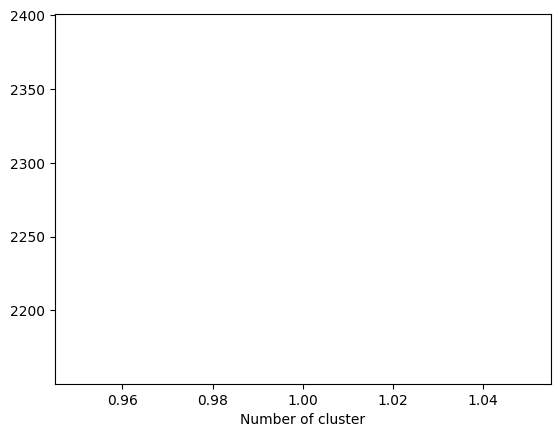

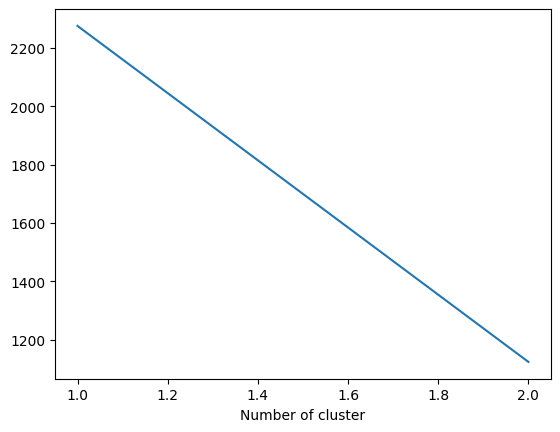

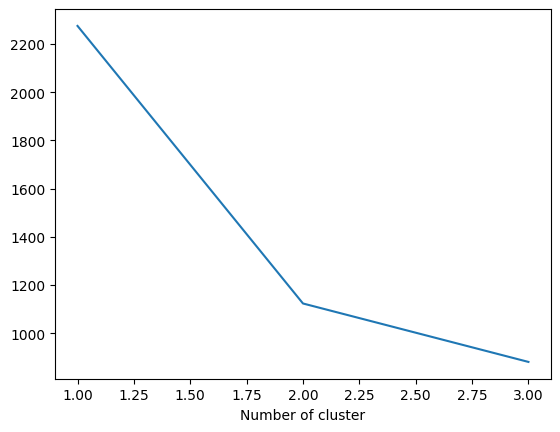

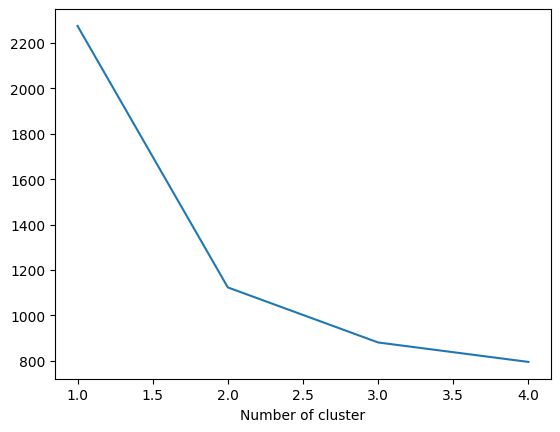

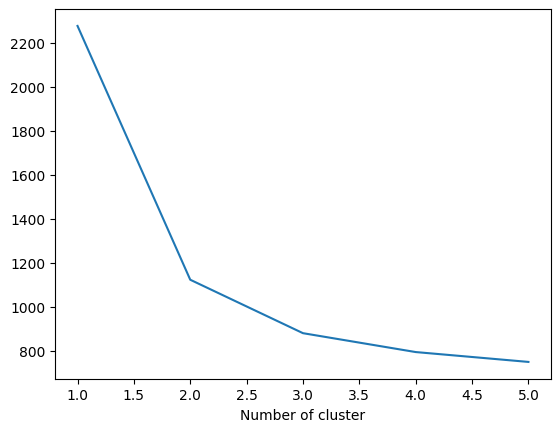

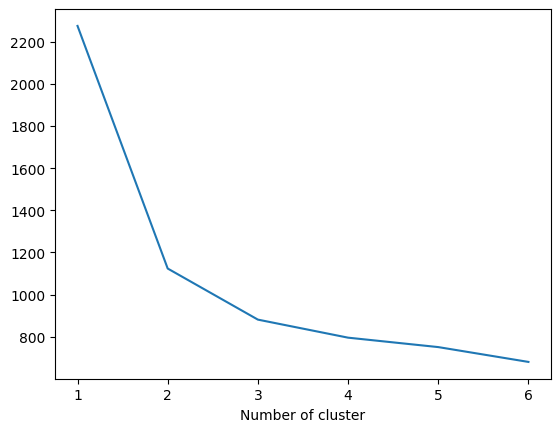

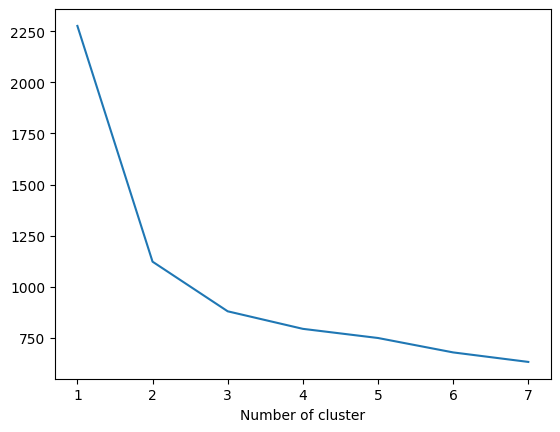

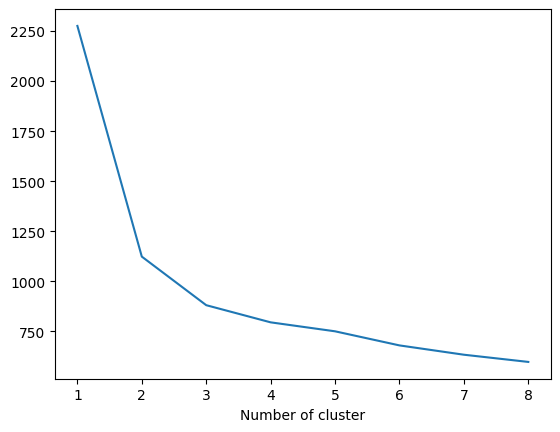

In [ ]:
## **a2. Un procedimiento para encontrar cuantos Cluster tendremos**
sse = {} # creamos un bucle me extraiga la inercia que es la suma de los errores al cuadrado
for k in range(1,9):
  kmeans = KMeans(n_clusters = k, max_iter = 200, n_init = 2).fit(df_marketing7)
  sse[k] = kmeans.inertia_ # inertia: suma de distancias de muestras de sus slosets cluster center
  plt.figure()
  plt.plot(list(sse.keys()),list(sse.values()))
  plt.xlabel('Number of cluster')
  plt.show

# **b. Otro método para saber el número de cluster es usar el _silhouette_score_ - En Barras**

+ Entre mas alto sea el score, mejor separacion abrá

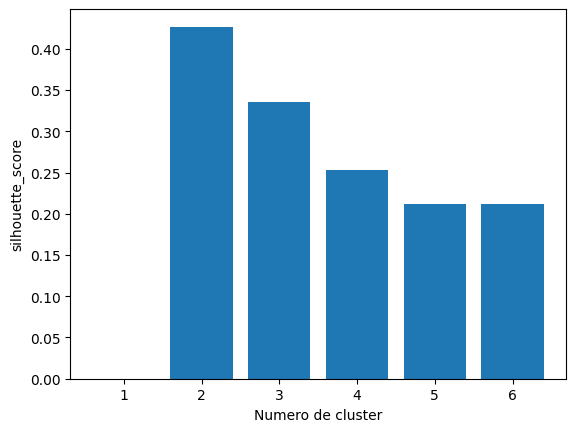

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [0] # se crea una lista para almacenar

for n_clusters in range (2,7): # bucle recorre
  silhouette_scores.append(
      silhouette_score(df_marketing7,KMeans(n_clusters=n_clusters).fit_predict(df_marketing7))
  )
k = [1,2,3,4,5,6]
plt.bar(k,silhouette_scores)
plt.xlabel('Numero de cluster', fontsize = 10)
plt.ylabel('silhouette_score', fontsize = 10)
plt.show()

# **c. Otro método para saber el número de cluster es usar el _silhouette_score_ - En Lineas**

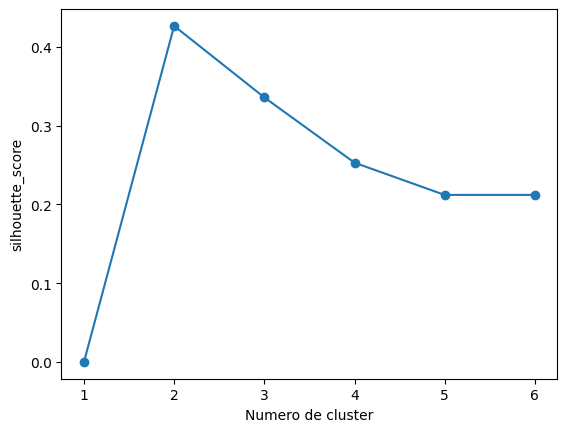

In [ ]:
plt.plot(k,silhouette_scores, marker = 'o')
plt.xlabel('Numero de cluster', fontsize = 10)
plt.ylabel('silhouette_score', fontsize = 10)
plt.show()

# **d. Con cuantos cluster nos debemos quedar**
+ Los métodos nos dicen que 2 o 3 o 4
+ Todo depende del investigador

In [ ]:
kmean_kpi = KMeans(n_clusters=3,random_state=43)
kmean_kpi.fit(df_marketing7)

KMeans(n_clusters=3, random_state=43)

In [ ]:
df_comp_prin['cluster']=kmean_kpi.labels_
df_marketing4['cluster']=kmean_kpi.labels_

In [ ]:
df_comp_prin['cluster'].value_counts()/len(df_comp_prin) # Porcentaje de cada cluster

1    0.420089
2    0.316964
0    0.262946
Name: cluster, dtype: float64

# **e. Graficamos nuestros cluster en 2D**

##  **e1. Usando PC1 y PC2**

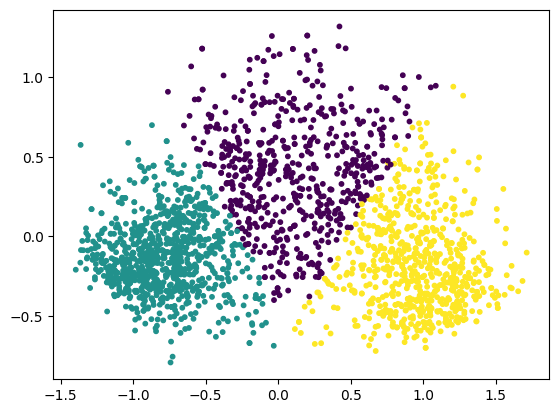

In [ ]:
##  **e1. Usando PC1 y PC2**
plt.scatter(df_comp_prin['PC1'],df_comp_prin['PC2'] , c=df_comp_prin['cluster'],s=10)

##  **e2. Usando PC1 y PC3**

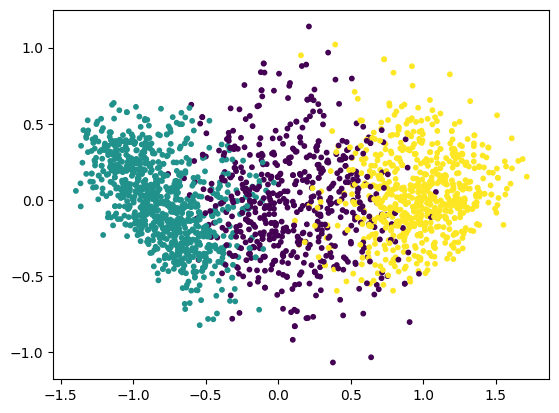

In [ ]:
##  **e2. Usando PC1 y PC3**
plt.scatter(df_comp_prin['PC1'],df_comp_prin['PC3'] , c=df_comp_prin['cluster'],s=10)

##  **e3. Usando PC1 y PC4**

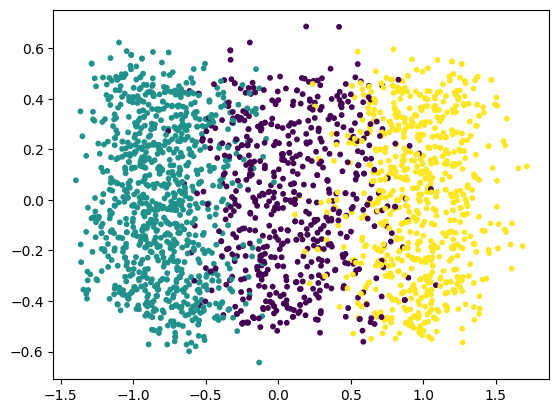

In [ ]:
##  **e3. Usando PC1 y PC4**
plt.scatter(df_comp_prin['PC1'],df_comp_prin['PC4'] , c=df_comp_prin['cluster'],s=10)

##  **e4. Usando PC1 y PC5**

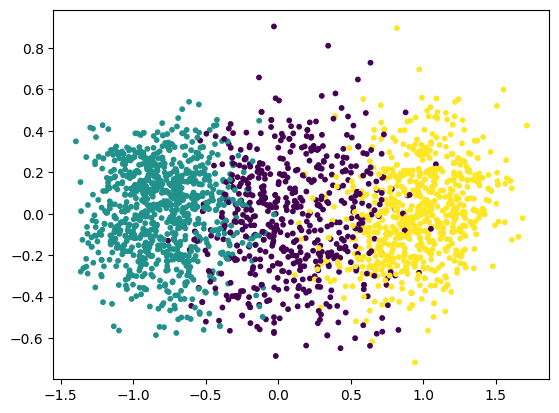

In [ ]:
##  **e4. Usando PC1 y PC5**
plt.scatter(df_comp_prin['PC1'],df_comp_prin['PC5'] , c=df_comp_prin['cluster'],s=10)

# **f. Graficamos nuestros cluster en 3D**

##  **f1. Usando PC1 PC2 y PC3**

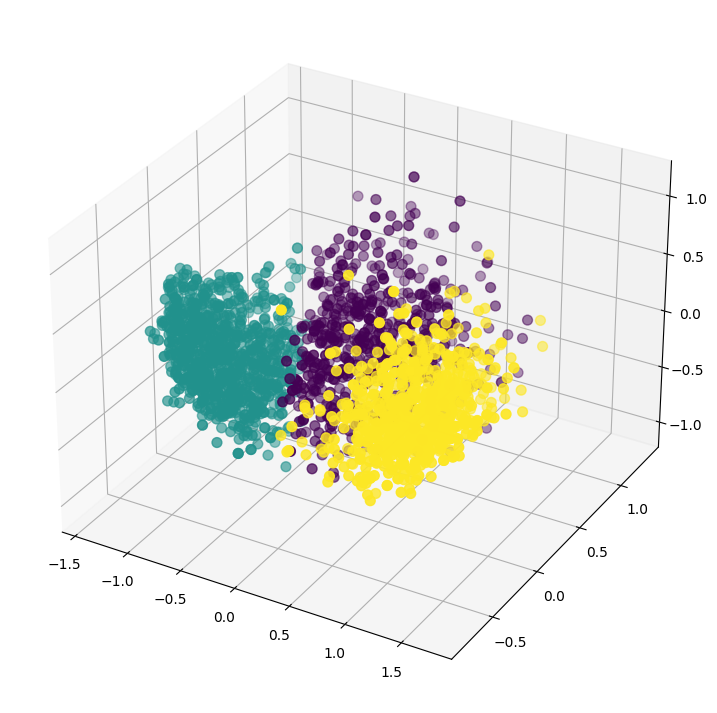

In [ ]:
##  **f1. Usando PC1 PC2 y PC3**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp_prin['PC1'],df_comp_prin['PC2'] ,df_comp_prin['PC3'], c=df_comp_prin['cluster'],s=50)

##  **f2. Usando PC1 PC2 y PC4**

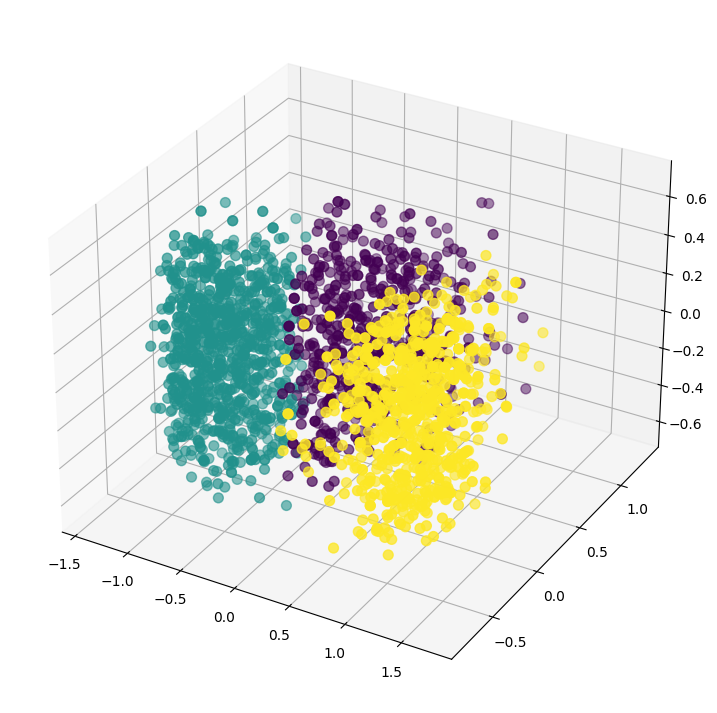

In [ ]:
##  **f2. Usando PC1 PC2 y PC4**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp_prin['PC1'],df_comp_prin['PC2'] ,df_comp_prin['PC4'], c=df_comp_prin['cluster'],s=50)

##  **f3. Usando PC1 PC2 y PC5**

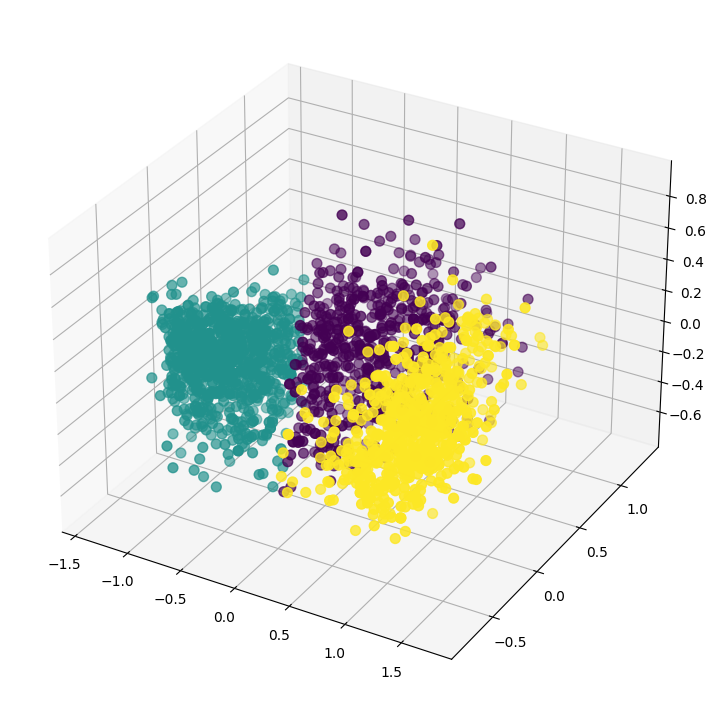

In [ ]:
##  **f3. Usando PC1 PC2 y PC5**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp_prin['PC1'],df_comp_prin['PC2'] ,df_comp_prin['PC5'], c=df_comp_prin['cluster'],s=50)

##  **f4. Usando PC2 PC3 y PC4**

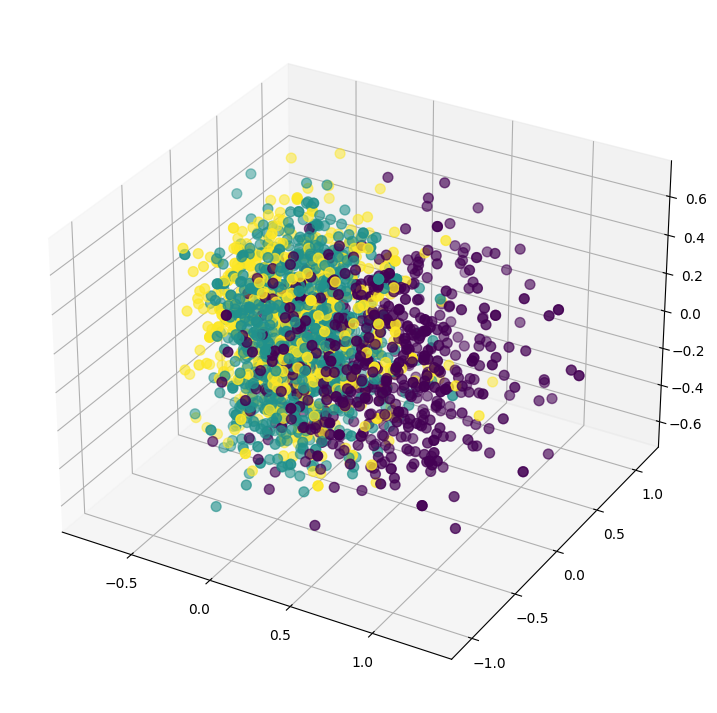

In [ ]:
##  **f4. Usando PC2 PC3 y PC4**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp_prin['PC2'],df_comp_prin['PC3'] ,df_comp_prin['PC4'], c=df_comp_prin['cluster'],s=50)

##  **f5. Usando PC2 PC3 y PC5**

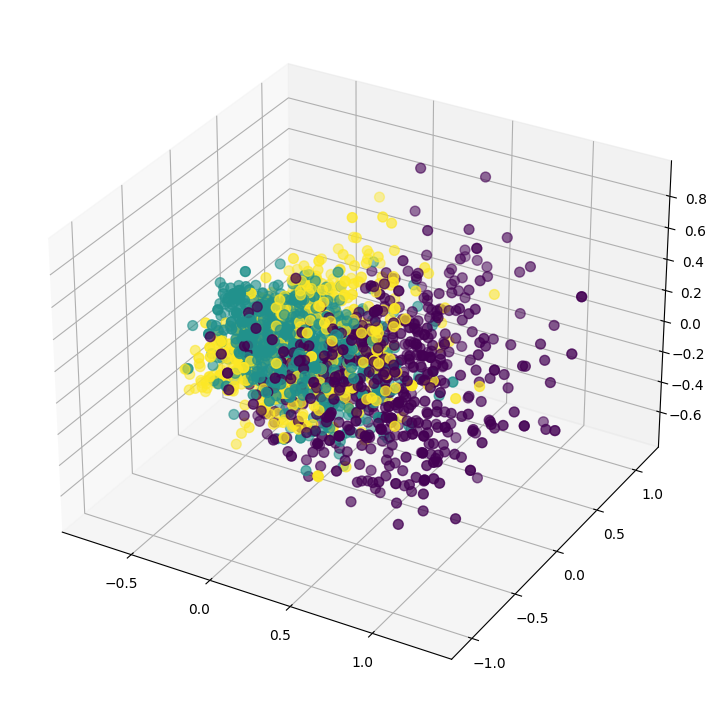

In [ ]:
##  **f5. Usando PC2 PC3 y PC5**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp_prin['PC2'],df_comp_prin['PC3'] ,df_comp_prin['PC5'], c=df_comp_prin['cluster'],s=50)

##  **f6. Usando PC2 PC4 y PC5**

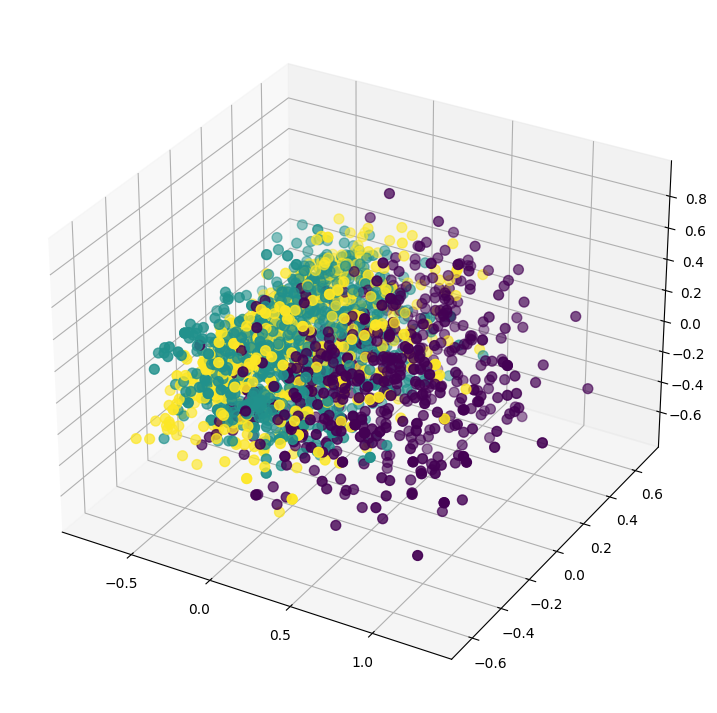

In [ ]:
##  **f6. Usando PC2 PC4 y PC5**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp_prin['PC2'],df_comp_prin['PC4'] ,df_comp_prin['PC5'], c=df_comp_prin['cluster'],s=50)